**<center></center>**
**<center></center>**
**<center></center>**
**<center></center>**
**<center></center>**
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<center>  </center>
<center> </center>
<center> «Анализ данных рынка вина» </center>
<center> </center>
<center></center>
 <center></center>
<center> </center>
<br>
<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинги вина, составляемые специализированным журналом Wine Enthusiast. Для анализа используется набор данных из Kaggle (профессиональное сообщество специалистов по обработке данных и машинному обучению). Датафрейм состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#6>6.  Выводы</a><br>


### Описание датасета
- Страна (country) - страна происхождения вина.<br>
- Описание (description) — описание вкусового профиля вина.<br>
- Георгафическое обозначение (designation) - виноградник-поставщик винограда для изготовления вина.<br>
- Рейтинг (points) - оценка вина специализированным журналом Wine Enthusiast, выраженная в баллах по шкале от 1 до 100.<br>
- Цена (price)- цена одной бутылки вина.<br>
- Провинция (province)— регион (провинция, штат) производства вина.<br>
- Регион 1 (redion 1) — зона виноделия в регионе (например, долина Напа в Калифорнии). <br>
- Регион 2 (region 2)— (необязательно) терруар виноделия - более конкретная область в винодельческом регионе (например, Резерфорд в долине Напа).<br>
- Разновидность (variety)— сорт винограда, используемый в производстве вина (например, Пино Нуар).<br>
- Винодельня (winery) — производитель вина.<br>

## 1.Предобработка данных

#### Загрузка библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import scipy.stats as st
import warnings

#### Загрузка данных

In [3]:
df = pd.read_csv("C:/Users/Asus/Documents/Python And Data Analysis/data/wine_reviews.csv", sep=',')

In [5]:
df.head(2)

country                                        description designation  \
0      US  With a delicate, silky mouthfeel and bright ac...         NaN   
1   Italy  D'Alceo is a drop dead gorgeous wine that ooze...     D'Alceo   

   points  price    province       region_1       region_2     variety  \
0      86   23.0  California  Central Coast  Central Coast  Pinot Noir   
1      96  275.0     Tuscany        Toscana            NaN   Red Blend   

                  winery  
0        MacMurray Ranch  
1  Castello dei Rampolla

#### Работа с пропущенными значениями

In [6]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

MissingValue  Percent
region_2            11942   59.710
designation          6001   30.005
region_1             3457   17.285
price                1802    9.010
country                 0    0.000
description             0    0.000
points                  0    0.000
province                0    0.000
variety                 0    0.000
winery                  0    0.000

Из таблицы видно, что в столбце 'region_2' почти 60% пропущенных значений. Так как  особой смысловой нагрузки этот столбец не несет, удаляем его. Кроме того, в столбце "price" имеется 9% пропусков. Их можно было бы заменить на медианные значения, но это может исказить дальнейшее исследование, поэтому лучше удалим - все равно остается не менее 90% данных. В столбцах 'designation'  и 'region_1' заменим пропуски на "unknown"

#### Удаление столбца "region_2", замена пропущенных значений в столбцах 'designation' и 'region_1'

In [6]:
df.drop(['region_2'], axis= 1 , inplace= True)

In [8]:
df = df.dropna(axis='index', how='any', subset=['price'])

In [10]:
df[['designation', 'region_1']] = df[['designation', 'region_1']].fillna(value='unknown')

In [12]:
df.drop_duplicates(inplace=True)

In [14]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'variety', 'winery'],
      dtype='object')

#### Переименовывание столбцов

In [16]:
df.columns = ['country','description', 'designation', 'points', 'price', 'province', 'region', 'variety', 'винодельня']

#### Добавление нового признака "color"

In [18]:
color = {"Chardonnay": "white", "Pinot Noir": "red", "Cabernet Sauvignon": "red","Red Blend": "red", 
         "Bordeaux-style Red Blend": "red", "Sauvignon Blanc": "white", "Syrah": "red", "Riesling": "white", 
         "Merlot": "red", "Zinfandel": "red", "Sangiovese": "red","Malbec": "red","White Blend": "white", 
         "Rosé": "other","Tempranillo": "red","Nebbiolo": "red","Portuguese Red": "red", "Pinot Grigio": "white", 
         "Sparkling Blend": "other","Shiraz": "red", "Corvina": "red", "Rondinella": "red", "Molinara": "red", 
         "Rhône-style Red Blend": "red", "Barbera": "red", "Pinot Gris": "white", "Viognier": "white", 
         "Bordeaux-style White Blend": "white", "Champagne Blend": "other", "Port": "red", 
         "Grüner Veltliner": "white","Gewürztraminer": "white", "Portuguese White": "white","Petite Sirah": "red", 
         "Carmenère": "red","Cabernet Sauvignon-Carmenèr": "red", "Pinot Grigio": "white", "Moscato": "white", 
         "Chenin Blanc": "white", "Austrian white blend": "white","Vidal Blanc": "white",
         "Rhône-style White Blend": "white", "Chenin Blanc": "white","Fumé Blanc": "white", "Pinot Blanc": "white", 
         "Sangiovese Grosso": "white", "Malvasia Bianca": "white","Sauvignon": "white", "Albariño": "white", 
         "Tokaji": "white", "Loureiro": "white", "Sémillon": "white", "Verdejo-Viura": "white", 
         "Nasco,Viura": "white", "Muscat": "white", "Gelber Muskateller": "white", "Zweigelt": "white", 
         "Chardonnay-Viognier": "white", "Blaufränkisch": "white", "Rhône-style White Blend": "white", 
         "Tokay": "white","Müller-Thurgau": "white", "Viognier-Chardonnay": "white", 
         "Sauvignon Blanc-Semillon": "white", "Blaufränkisch": "white", "Prosecco": "white", "Vermentino": "white", 
         "Silvaner": "white","Melon": "white", "Spätburgunder": "white", "Dolcetto d’Alba": "white", 
         "Grenache Blanc": "white", "Furmint":"white", "Muscatel": "white", "Muscat Canelli": "white", 
         "Rkatsiteli": "white", "Weissburgunder": "white", "Fumé Blanc": "white", "Prugnolo Gentile": "white",
         "Tinto del Pais": "white", "Vidal Blanc": "white", "Fumé Blanc": "white", "Tinto del Pais": "white",
         "Pinot Noir-Gamay": "red", "Cabernet Franc": "red", "Monastrell-Syrah": "red", "Tempranillo Blend": "red", 
         "Nero d’Avola": "red", "Bastardo,Grenache": "red", "Malbec-Merlot": "red", 
         "Malbec-Cabernet Sauvignon": "red", "Tannat-Cabernet": "red", "Tannat": "red", "Garnacha": "red",
         "Merlot-Cabernet": "red", "Tempranillo Blend": "red", "Negroamaro": "red", "Shiraz-Viognier": "red", 
         "Cabernet Sauvignon-Shiraz": "red", "Cabernet Blend": "red", "Tempranillo Blend": "red", 
         "Sangiovese Grosso": "red", "Syrah-Grenache": "red", "Tempranillo Blend": "red", "Malvasia Nera": "red", 
         "Pinot Nero": "red", "Pinot Noir-Gamay": "red", "Black Muscat": "red", "Bastardo": "red", 
         "Grenache": "red", "Gamay": "red", "Falanghina": "red", "Pinotage": "red", "Marsanne": "red", 
         "Tannat-Cabernet": "red", "Grenache-Syrah": "red", "Brachetto": "red", "Alicante Bouschet": "red", 
         "Verdejo": "red", "Bobal": "red", "Tocai Friulano": "white", "Semillon-Chardonnay": "white", 
         "Touriga Nacional": "red","Nasco": "red", "Assyrtico":"white", "Syrah-Cabernet":"red", "Viura": "red", 
         "Mourvèdre": "red", "Nuragus": "red", "Claret": "red", "Petit Verdot": "red","Vignoles": "red", 
         "Sherry": "red", "Petit Verdot": "red", "Dolcetto": "red", "Malbec-Syrah": "red", 
         "Austrian Red Blend": "red", "Syrah-Cabernet": "red","Baga": "red", "Cabernet Blend": "red", 
         "Viura": "red", "Montepulciano": "red", "Friulano": "red", "Cabernet Sauvignon-Merlot": "red", 
         "Garganega": "red","G-S-M": "red", "Mission": "red", "Meritage": "red", "Vernaccia": "red", 
         "Primitivo": "red", "Merlot-Cabernet Sauvignon": "red", "Shiraz-Cabernet Sauvignon": "red", 
         "Malvasia": "red", "Mencía": "red", "Cabernet Sauvignon-Malbec":"red", "Tinta de Toro":"red", 
         "Tinto Fino": "red", "Meritage": "red", "Glera":"white","Torrontés":"red", 
         "Rhône-style White Blend":"white","Aglianico":"red", "Sauvignon":"white", "Cabernet Sauvignon-Syrah":"red",
         "Roussanne":"white","Agiorgitiko":"red", "Fiano":"white", "Bonarda":"red", "St. Laurent":"red",
         "Grillo":"white", "Pinot Bianco":"white", "Semillon-Sauvignon Blanc": "white", "Greco":"white",
         "Godello":"white", "Carignan":"red","Verdelho":"white", "Sagrantino":"red",
         "Tempranillo-Cabernet Sauvignon":"red", "Lagrein":"red","Cabernet Sauvignon-Cabernet Franc":"red", 
         "Xinomavro":"red", "Insolia":"white", "Fernão Pires":"white", "Cannonau":"red", "Verdicchio":"white", 
         "Cabernet Merlot":"red","Tempranillo-Garnacha":"red","Marsanne-Roussanne":"red", "Cortese":"white", 
         "Syrah-Cabernet":"red", "Portuguese Sparkling":"white", "Pecorino":"white", "Aligoté":"white", 
         "Nerello Mascalese":"red", "Cabernet-Sauvignon-Carmenère":"red", "Carignano":"red", "Pedro Ximénez":"red", 
         "Cabernet":"red","Arneis":"white", "Alvarinho":"white", "Arinto":"white", "Austrian Red Blend":"red", 
         "Turbiana":"white", "Lambrusco":"red", "Castelão":"red", "Roditis":"white","Traminer":"white", 
         "Zibibbo":"white", "Gros and Petit Manseng":"white", "Inzolia":"white", "Ribolla Gialla":"white", 
         "White Riesling":"white", "Catarratto":"white","Petite Verdot":"red", "Alsace white blend":"white", 
         "Petit Manseng":"red", "Colombard": "white", "Tempranillo-Shiraz":"red", "Malbec-Tannat":"red",
         "Pinot Meunier": "white", "Moscatel": "white", "Encruzado": "white", "Garnacha Blanca": "white", 
         "Rosato":"red", "Norton":"red", "Auxerrois":"white", "Graciano":"red", 
         "Touriga Nacional-Cabernet Sauvignon":"red", "Provence red blend":"red", "Xarel-lo": "white", 
         "Teran":"red","Orange Muscat": "white", "Syrah-Cabernet Sauvignon":"red", "Madeira Blend": "white", 
         "Alfrocheiro": "red", "Colombard-Sauvignon Blanc": "white", "Merlot-Cabernet Franc":"red", 
         "Monica":"red", "Sylvaner":"white", "Dornfelder":"red", "Lemberger":"red", "Aragonês":"red", 
         "Johannisberg Riesling":"white", "Trebbiano":"white", "Syrah-Petite Sirah":"red", 
         "Verduzzo Friulano":"white", "Antão Vaz":"white", "Viura-Chardonnay":"white", "Shiraz-Grenache": "red", 
         "Semillon-Chardonnay":"white", "Charbono":"red", "Tokay":"white", "Sauvignon Blanc-Semillon":"white", 
         "Moschofilero":"white", "Piedirosso":"red", "Saperavi":"red", "Prieto Picudo":"red","Syrah-Viognier":"red",
         "Posip":"white", "Grechetto":"white","Trincadeira":"red", "Bical":"white", "Feteasca Neagra":"red", 
         "Verduzzo":"white", "Rieslaner":"white","Teroldego":"red", "Scheureb":"white", "Uva di Troia":"red", 
         "Macabeo":"white", "Traminette":"white","Zlahtina":"white", "Carignan-Grenache":"red", "Tinta Roriz":"red",
         "Grauburgunder":"white", "icpoul":"red","Viognier-Roussanne":"red", "Negrette":"red", "Mataro":"red", 
         "Passerina":"white", "Viognier-Marsanne":"red", "Gros Manseng":"white","Merlot-Cabernet":"red", 
         "Pallagrello":"white", "Picolit":"white", "Carricante":"white", "Provence white blend":"white", 
         "Carignane":"red", "Gelber Muskateller":"white", "Welschriesling":"white", "Touriga Franca":"red",
         "Cabernet Sauvignon-Tempranillo":"red", "Rosado":"red", "Mavrodaphne":"red", "Shiraz-Tempranillo":"red", 
         "Rkatsiteli":"white", "Cesanese d’Affile":"red", "Mission":"red", "Raboso":"red", 
         "Carmenère-Cabernet Sauvignon":"red"}

In [20]:
df['color'] = df['variety'].map(color)

#### Удаление пропусков по столбцу "color"

In [22]:
df.dropna(subset=['color'], inplace=True)

#### Кодирование столбца с цветом вина ('red':1, 'white':2, 'other':0) в новый: "color_code"

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['color_code'] = label_encoder.fit_transform(df['color'])

In [26]:
df['color_code'].value_counts()

color_code
1    10799
2     5293
0      717
Name: count, dtype: int64

#### Преобразование скрытых дубликатов столбца "variety"

In [28]:
df['variety'] = df['variety'].replace(["Tokaji", "Tokay", "Tokaji", "Tocai Friulano"], "Tokay")
df['variety'] = df['variety'].replace(["Shiraz-Viognier","Shiraz-Tempranillo", "Shiraz-Grenache", 
                                       "Tempranillo-Shiraz","Syrah", "Monastrell-Syrah", "Syrah-Cabernet", 
                                       "Malbec-Syrah","Syrah-Cabernet Sauvignon","Syrah-Petite Sirah", 
                                       "Syrah-Viognier", "Syrah-Cabernet","Syrah-Cabernet","Grenache-Syrah"], 
                                      "Shiraz")
df['variety'] = df['variety'].replace(["Chardonnay-Viognier", "Viognier-Chardonnay", "Viura-Chardonnay",
                                       "Semillon-Chardonnay"], "Chardonnay")
df['variety'] = df['variety'].replace(["Pinot Noir-Gamay", "Pinot Nero", "Pinot Noir-Gamay"], "Pinot Noir")
df['variety'] = df['variety'].replace(["Pinot Bianco"], "Pinot Blanc")
df['variety'] = df['variety'].replace(["Cabernet Blend", "Cabernet Franc"], "Cabernet")
df['variety'] = df['variety'].replace(["Sauvignon Blanc", "Sauvignon-Tempranillo", "Sauvignon Blanc-Semillon", 
                                       "Sauvignon Blanc-Semillon"], "Sauvignon")
df['variety'] = df['variety'].replace(["Johannisberg Riesling", "White Riesling", "Welschriesling"], "Riesling")
df['variety'] = df['variety'].replace(["Cabernet Sauvignon-Carmenèr", "Cabernet Sauvignon-Cabernet Franc", 
                                       "Cabernet Sauvignon-Carmenère", "Touriga Nacional-Cabernet Sauvignon", 
                                       "Cabernet Sauvignon-Tempranillo","Carmenère-Cabernet Sauvignon", 
                                       "Tempranillo-Cabernet Sauvignon","Malbec-Cabernet Sauvignon",
                                       "Cabernet Sauvignon-Shiraz", "Cabernet Sauvignon-Malbec", 
                                       "Cabernet Sauvignon-Syrah"], "Cabernet Sauvignon")
df['variety'] = df['variety'].replace(["Merlot-Cabernet Sauvignon","Merlot-Cabernet Franc"], "Merlot-Cabernet")
df['variety'] = df['variety'].replace(["Moscato", "Moscatel", "Muscatel", "Muscat Canelli", "Orange Muscat"], 
                                      "Muscat") 

In [169]:
df.isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region         0
variety        0
винодельня     0
color          0
color_code     0
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16809 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      16809 non-null  object 
 1   description  16809 non-null  object 
 2   designation  16809 non-null  object 
 3   points       16809 non-null  int64  
 4   price        16809 non-null  float64
 5   province     16809 non-null  object 
 6   region       16809 non-null  object 
 7   variety      16809 non-null  object 
 8   винодельня   16809 non-null  object 
 9   color        16809 non-null  object 
 10  color_code   16809 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 1.5+ MB


In [156]:
df.describe()

points         price    color_code
count  16809.000000  16809.000000  16809.000000
mean      87.795586     33.374502      1.272235
std        3.247373     40.555747      0.532402
min       80.000000      5.000000      0.000000
25%       86.000000     16.000000      1.000000
50%       88.000000     24.000000      1.000000
75%       90.000000     40.000000      2.000000
max      100.000000   2300.000000      2.000000

#  <a name="2"> 2. Исследовательский анализ данных</a>
* НОпределение средней цены вина по региону.
* Определение самых дорогих сортов.
* Определение самых популярных сортов вина в бюджетном сегменте.
* Определение сортов-лидеров по рейтингам.
* Построение графиков рейтингов вина в разбивке по странам и сортам.
* Выявление закономерностей влияния на цену цвета и рейтинга вина.
* Построение диаграммы рассеяния, выявление корреляций.


### В работе исследуются рынки стран, расположенных на 48-ой параллели: Венгрии, Австрии, Германии и Франции.

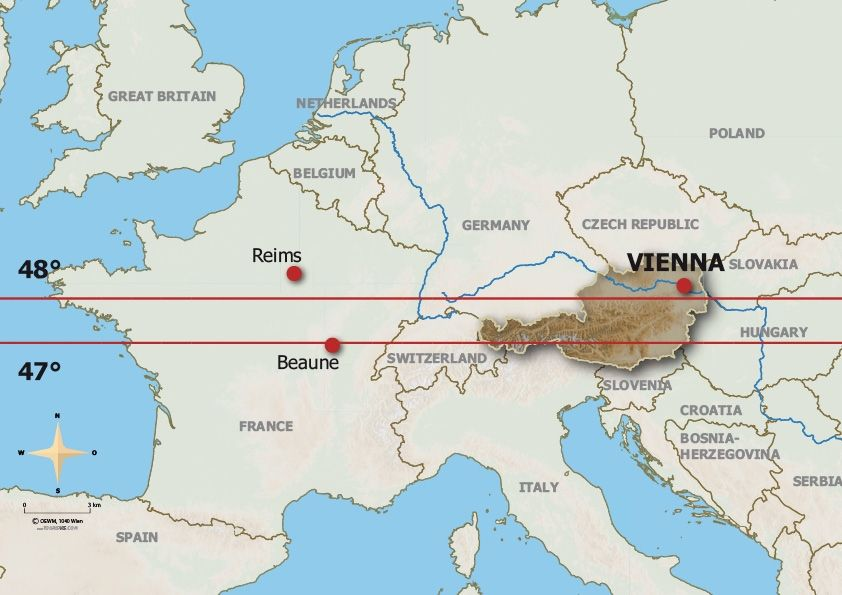

Рисунок 1. Страны, расположенные на 48 параллели

### ВИНА ВЕНГРИИ

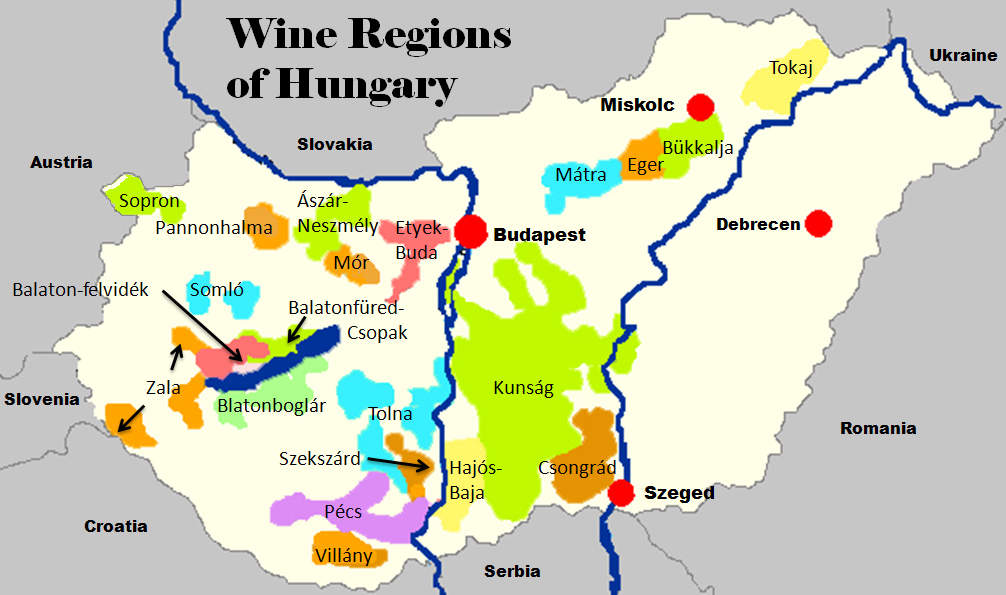

Рисунок 2. Винодельческие регионы Венгрии

In [30]:
df3=df.loc[df['country']=='Hungary']
hungary_price = df3.sort_values("price", ascending=False)
hungary_price[:4]

country                                        description  \
8493   Hungary  Surprisingly subtle, yet maddeningly complex, ...   
5440   Hungary  An intoxicating bouquet of beeswax, honeysuckl...   
13438  Hungary  Heady with notes of orange marmalade and laven...   
19683  Hungary  A beautiful, aromatic nose of honey, orange, a...   

                     designation  points  price province   region  variety  \
8493                    Essencia      94  764.0   Tokaji  unknown  Furmint   
5440            Aszú 6 Puttonyos      96  125.0   Tokaji  unknown    Tokay   
13438    Betsek Aszú 6 Puttonyos      91  104.0    Tokaj  unknown    Tokay   
19683  Aszú 6 Puttonyos - 500 ml      91  100.0   Tokaji  unknown    Tokay   

         винодельня  color  color_code  
8493   Royal Tokaji  white           2  
5440         Dobogó  white           2  
13438  Royal Tokaji  white           2  
19683      Disznókö  white           2

Исходя из таблицы самые дорогие и самые рейтинговые вергерские вина - Токайские. Самый дорогой сорт Furmint от винодельни - Royal Tokaji - 764 долл. Далее идет Токайское от винодельни Dobogó - цена которого ниже (125 долл), а рейтинг выше (96). Обе винодельни относительно молоды - они были основаны в 1990-х годах и обе небольшие - семейные производства. 

In [120]:
taste3 = df3.description[8493]
taste3

'Surprisingly subtle, yet maddeningly complex, this is a rare treat to unravel slowly, sip by sip. Sweet and honeyed on the nose with scents of freesia, orange peel and stone fruit, but accented with just a hint of sun-dried hay. The palate is deeply concentrated with undulating waves of honey, beeswax and fruit, but balanced with striking tangerine acidity. Remarkably long on the finish.'

Из столбца "description" определим описание самого дорогого венгерского вина: "Сладкий и медовый аромат с нотами фрезии, апельсиновой цедры и косточковых фруктов, но с легким оттенком высушенного на солнце сена. Вкус глубоко сконцентрирован с волнистыми волнами меда, пчелиного воска и фруктов, но сбалансирован поразительной мандариновой кислотностью".

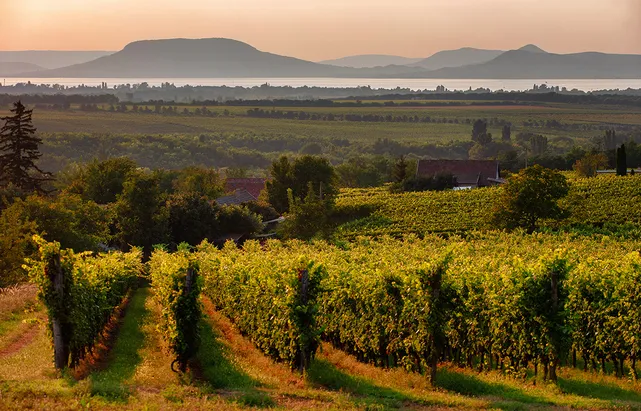

Рисунок 3. Винодельня Royal Tokaji, расположенная в северной части Венгрии - в провинции Tokaji.

Высокая стоимость токайских вин может быть связана с процессом их производства, которое отличается сложностью и затратностью. Их делают из винограда, затронутого ботритисом — благородной плесенью, которая высушивает ягоды, повышая в них концентрацию сахара и придавая винам оттенки меда, жимолости и сухофруктов. Ботритизированные ягоды, как и вина из них, в Токае называют Aszú.  Вино изготавливается из 6 автохтонных сортов: Furmint, Hárslevelü, Kabar, Kövérszölö, Zéta и Sárgamuskotály, причем виноград для него собирают исключительно вручную. Готовое вино обладает насыщенным янтарно-золотистым цветом, содержание сахара в нем достигает 120-180 г/литр, и оно может храниться бесконечно долго без потери качества и вкуса. 

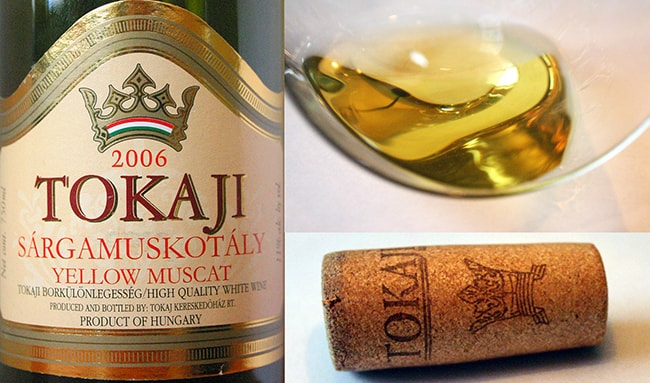

Рисунок 4. Логотип, пробка, цвет  - как атрибуты венгерского токайского вина. 

In [115]:
print(f'Средняя цена венгерского вина: {round(df3.price.mean(), 1)} долл.')

Средняя цена венгерского вина: 64.8 долл.


### Распределение рейтингов и цен по сортам венгерских вин

In [179]:
variety_points3 = pd.pivot_table(data=df3,
    index=['variety', 'color'], 
    values=['points', 'price'],
    aggfunc=['min', 'max','mean'])
variety_points3

min          max              mean  \
                               points price points  price     points   
variety                  color                                         
Bordeaux-style Red Blend red       83  52.0     86   52.0  84.500000   
Cabernet                 red       85   9.0     89   45.0  86.333333   
Chardonnay               white     80  12.0     80   12.0  80.000000   
Furmint                  white     85  17.0     94  764.0  88.666667   
Merlot                   red       89  76.0     89   76.0  89.000000   
Pinot Gris               white     84   7.0     84    7.0  84.000000   
Red Blend                red       82   8.0     84   29.0  83.000000   
Rosé                     other     85  15.0     85   15.0  85.000000   
Sauvignon                white     86   9.0     86    9.0  86.000000   
Shiraz                   red       83  20.0     83   20.0  83.000000   
Sparkling Blend          other     83  10.0     83   10.0  83.000000   
Tokay                    white     87  20.0     96  125.0  91.307692   
Traminer                 white     86  23.0     86   23.0  86.000000   

                                            
                                     price  
variety                  color              
Bordeaux-style Red Blend red     52.000000  
Cabernet                 red     28.000000  
Chardonnay               white   12.000000  
Furmint                  white  267.000000  
Merlot                   red     76.000000  
Pinot Gris               white    7.000000  
Red Blend                red     18.500000  
Rosé                     other   15.000000  
Sauvignon                white    9.000000  
Shiraz                   red     20.000000  
Sparkling Blend          other   10.000000  
Tokay                    white   62.307692  
Traminer                 white   23.000000

Из таблицы можно заключить, что самая высокая средняя цена у сорта винограда Фурминт, из которого делают знаменитые токайские вина (моно- или в купажах) - 267 долл, на втором месте собственно Токайские сорта (62 долл), на третьем - Bordeaux-style Red Blend (52 долл).   Самые высокие средние рейтинги у Токайских (91,3), самые низкие - у сорта Шардоне (80). 

In [32]:
budget3=df3[df3['price']<20]
variety3 = pd.pivot_table(data=budget3,
    index=['variety', 'color'], 
    values=['points', 'price'],
    aggfunc=['mean'])
variety3

mean      
                      points price
variety         color             
Cabernet        red     85.0   9.0
Chardonnay      white   80.0  12.0
Furmint         white   87.0  17.0
Pinot Gris      white   84.0   7.0
Red Blend       red     84.0   8.0
Rosé            other   85.0  15.0
Sauvignon       white   86.0   9.0
Sparkling Blend other   83.0  10.0

Судя по таблице, самый высокий рейтинг среди бюджетных (до 20 долл) у Фурминта (рейтинг 87, цена 17), 
далее идет Sauvignon Blanc (рейтинг 86, цена всего 9 долл) - отличное соотношение цены и рейтинга. 
Самый низкий средний рейтинг у Шардоне (80).   Токайские вина в бюджетную группу не попали 
(вероятно, из-за принадлежности к более высокому ценовому сегменту.)

### ВИНА АВСТРИИ

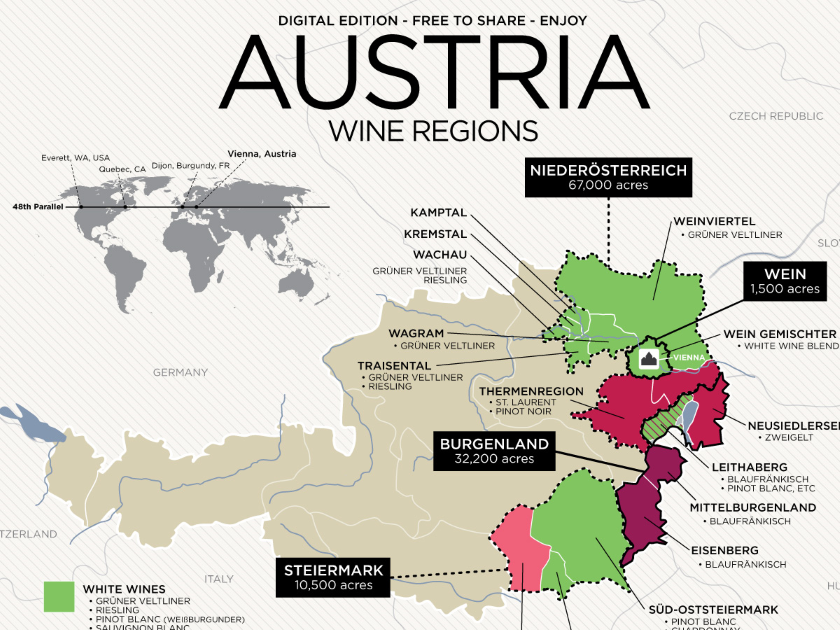

Рисунок 5. Винодельческие регионы Австрии.

In [42]:
df2=df.loc[df['country']=='Austria']
austria_price = df2.sort_values("price", ascending=False)
austria_price[:5]

country                                        description  \
4324   Austria  Wet earth, rain-wet stones, damp moss, wild sa...   
7484   Austria  You can hear the richness of this wine as you ...   
5      Austria  This is always a major wine, and this vintage ...   
15625  Austria  This could be the apotheosis of St Laurent, a ...   
16040  Austria  While there are signs of maturity, this wine s...   

                                designation  points   price       province  \
4324                Ried Loibenberg Smaragd      94  1100.0         Wachau   
7484   Zöbinger Heiligenstein Beerenauslese      94    99.0        Kamptal   
5            Dürnsteiner Kellerberg Smaragd      96    89.0         Wachau   
15625          Ried Holzspur Grande Reserve      92    89.0  Thermenregion   
16040                  Steiner Hund Reserve      91    84.0       Kremstal   

        region           variety            винодельня  color  color_code  
4324   unknown  Grüner Veltliner        Emmerich Knoll  white           2  
7484   unknown          Riesling           Bründlmayer  white           2  
5      unknown          Riesling           F X Pichler  white           2  
15625  unknown       St. Laurent  Johanneshof Reinisch    red           1  
16040  unknown          Riesling            Nikolaihof  white           2

Самый дорогой австрийский сорт (1100 долл) - Grüner Veltliner (белый сорт винограда 
Грюнер Вельтлинер очень популярен и занимает треть плантаций в стране; максимально раскрылся на винодельне Emmerich Knoll 
(регион Вахау)). 
Далее по стоимости (80-100 долл) идут Рислинги разных производителей и, как ни странно, 
в пятерку самых дорогих попало красное вино - St. Laurent (92 долл)

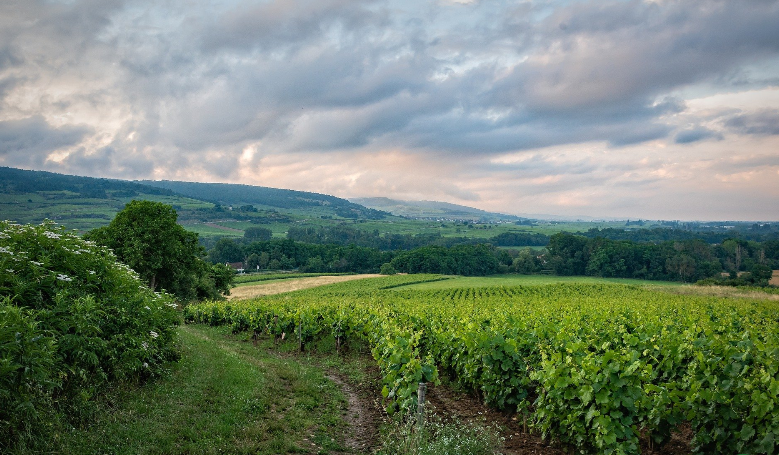

Рисунок 6. Винодельня Emmerich Knoll, растянувшаяся по берегам реки Дунай

In [211]:
print(f'Средняя цена австрийского вина: {round(df2.price.mean(), 1)} долл.')

Средняя цена австрийского вина: 32.1 долл.


### Распределение сортов австрийских вин по ценам

In [198]:
variety_price2 = pd.pivot_table(data=df2,
    index=['variety', 'color'], 
    values=['price'],
    aggfunc=['min','max','mean'])
variety_price2

min     max       mean
                                price   price      price
variety                   color                         
Austrian Red Blend        red    15.0    55.0  29.400000
Austrian white blend      white  15.0    69.0  34.857143
Blaufränkisch             white  12.0    60.0  26.782609
Bordeaux-style Red Blend  red    39.0    39.0  39.000000
Cabernet                  red    28.0    28.0  28.000000
Cabernet Sauvignon-Merlot red     8.0    63.0  35.500000
Chardonnay                white  12.0    60.0  29.166667
Gelber Muskateller        white  22.0    22.0  22.000000
Grauburgunder             white  23.0    23.0  23.000000
Grüner Veltliner          white  10.0  1100.0  33.983051
Pinot Blanc               white  16.0    20.0  17.666667
Pinot Gris                white  22.0    22.0  22.000000
Pinot Noir                red    20.0    62.0  35.750000
Red Blend                 red    11.0    60.0  32.636364
Riesling                  white  12.0    99.0  36.642857
Rosé                      other  13.0    14.0  13.500000
Sauvignon                 white  15.0    60.0  31.375000
Sparkling Blend           other  19.0    19.0  19.000000
St. Laurent               red    15.0    89.0  37.857143
Traminer                  white  27.0    27.0  27.000000
Weissburgunder            white  17.0    50.0  29.400000
White Blend               white  11.0    25.0  18.333333
Zweigelt                  white   9.0    65.0  22.615385

Исходя из таблицы, самые высокие средние цены у красных австрийских вин: Bordeaux-style Red Blend (39 долл) и St. Laurent (37,9). Тройку лидеров замыкают Рислинги (37,5). Самая низкая средняя цена у розовых вин (Rose) - 13,5 долл. В целом цены на австрийские вина не сильно отличаются от цен на немецкие, однако они распределены более равномерно. 

### Распределение рейтингов по сортам австрийских вин

In [204]:
variety_price2 = pd.pivot_table(data=df2,
    index=['variety', 'color'], 
    values=['points'],
    aggfunc=['min', 'max','mean'])
variety_price2

min    max       mean
                                points points     points
variety                   color                         
Austrian Red Blend        red       85     93  89.400000
Austrian white blend      white     85     93  90.857143
Blaufränkisch             white     85     94  89.565217
Bordeaux-style Red Blend  red       92     92  92.000000
Cabernet                  red       84     84  84.000000
Cabernet Sauvignon-Merlot red       85     91  88.000000
Chardonnay                white     82     91  88.166667
Gelber Muskateller        white     88     88  88.000000
Grauburgunder             white     90     90  90.000000
Grüner Veltliner          white     84     94  88.983051
Pinot Blanc               white     87     90  88.666667
Pinot Gris                white     86     86  86.000000
Pinot Noir                red       86     91  88.083333
Red Blend                 red       87     92  89.181818
Riesling                  white     84     96  90.285714
Rosé                      other     84     89  85.750000
Sauvignon                 white     85     93  88.625000
Sparkling Blend           other     83     83  83.000000
St. Laurent               red       85     92  88.714286
Traminer                  white     92     92  92.000000
Weissburgunder            white     87     93  89.800000
White Blend               white     88     92  90.000000
Zweigelt                  white     84     93  87.500000

Самые высокие средние рейтинги у сортов Traminer (92), а также у австрийских рислингов - 90,4. Самые ннизкие средние рейтинги у игристных сортов (83) 

In [207]:
budget2=df2[df2['price']<20]
variety2 = pd.pivot_table(data=budget2,
    index=['country', 'variety', 'color'], 
    values=['points', 'price'],
    aggfunc=['mean'])
variety2[:9]

mean           
                                            points      price
country variety                   color                      
Austria Austrian Red Blend        red    87.500000  16.000000
        Austrian white blend      white  85.000000  15.000000
        Blaufränkisch             white  88.500000  15.600000
        Cabernet Sauvignon-Merlot red    85.000000   8.000000
        Chardonnay                white  88.000000  14.500000
        Grüner Veltliner          white  87.636364  15.436364
        Pinot Blanc               white  89.500000  16.500000
        Red Blend                 red    88.000000  11.000000
        Riesling                  white  88.200000  16.700000

Среди бюджетных австрийских сортов (стоимостью до 20 долл) можно выделить Pinot Blanc 
(самый высокий рейтинг в анализируемой категории - 89,5, цена 16,5), 
фирменное Grüner Veltliner (рейтинг почти 88, цена 15,4 долл), также белое Blaufränkisch (рейтинг 88,5, цена 15,6), 
Chardonnay (рейтинг 88, цена всего 14,5) и конечно рислинги (рейтинг 88,5, цена 17,5 долл) 

Относительно невысокие средние цены (ниже, чем в Венгрии) объясняются, возможно, тем, что в 1985 году в некоторых винах Австрии был обнаружен диэтиленгликоль, один из компонентов антифриза, являющийся опасным для здоровья. Оказалось, что некоторые недобросовестные производители добавляли этот компонент в свои вина для того, чтобы напиток был более плотным и сладким.   Репутации австрийских вин был нанесен непоправимый ущерб. В Европе, да и в самой Австрии, их просто перестали пить.   Но скандал не заставил австрийских виноделов сдаться, а побудил руководство страны серьезно пересмотреть стандарты производства вина и ужесточить винное законодательство. На данный момент требования к винам именно в Австрии можно назвать чуть ли не самыми жесткими в мире. Кроме того, что в Австрии была введена система апелласьонов (утверждённых наборов требований для контроля происхождения вина и виноматериалов), как во Франции, которая контролирует и местность, и устанавливает требования к используемым сортам винограда, австрийское законодательство регламентирует даже органолептический стиль вина. Поэтому рейтинги австрийских вин находятся в данный момент на довольно высоком уровне.

### ВИНА ГЕРМАНИИ

In [50]:
df1=df.loc[df['country']=='Germany']
germany_price = df1.sort_values("price", ascending=False)
germany_price[:5]

country                                        description  \
11037  Germany  With scents of dried apricots and superconcent...   
5183   Germany  Perhaps a step behind Weil's other supersweet ...   
4748   Germany  Exceeds even this producer's stunning beerenau...   
8740   Germany  Like all of the Schloss's noble sweet wines, t...   
11606  Germany  This wine reeks of intensity, from its powerfu...   

                                             designation  points  price  \
11037                        Rosa-Goldlack Beerenauslese      93  395.0   
5183                         Kiedrich Gräfenberg Eiswein      94  376.0   
4748   Deidesheimer Hohenmorgen Trockenbeerenauslese ...      97  245.0   
8740   Serrig Schloss Saarsteiner Beerenauslese Goldk...      94  231.0   
11606         Casteller Schlossberg Trockenbeerenauslese      90  177.0   

       province   region   variety                          винодельня  color  \
11037  Rheingau  unknown  Riesling              Schloss Johannisberger  white   
5183   Rheingau  unknown  Riesling                         Robert Weil  white   
4748      Pfalz  unknown  Riesling  Geh. Rat Dr. von Bassermann-Jordan  white   
8740      Mosel  unknown  Riesling                   Schloss Saarstein  white   
11606   Franken  unknown  Silvaner                             Castell  white   

       color_code  
11037           2  
5183            2  
4748            2  
8740            2  
11606           2

Как видно из таблицы подавляющее большинство дорогих немецких вин представлено Рислингами (рислинговые сорта занимают четверть плантаций страны, вкусы от сухого до сладкого), пятерку ценовых лидеров замыкает Silvaner, который не уступает по качеству, но менее распространен, так как выращивать его труднее. Самое дорогое (395 долл) немецкое вино из представленных - рислинг винодельни Schloss Johannisberger, чей рейтинг не самый высокий - всего 93, далее идет рислинг от винодельни Robert Weil, стоимостью 376 долл, с рейтингом 94. Что интересно, самый высокий рейтинг из пятерки представленных (97) у Рислинга винодельни Geh. Rat Dr. von Bassermann-Jordan при цене 245 долл. Стоит обратить внимание еще и на то, что самые дорогие немецкие вина производятся в провинции Rheingau 

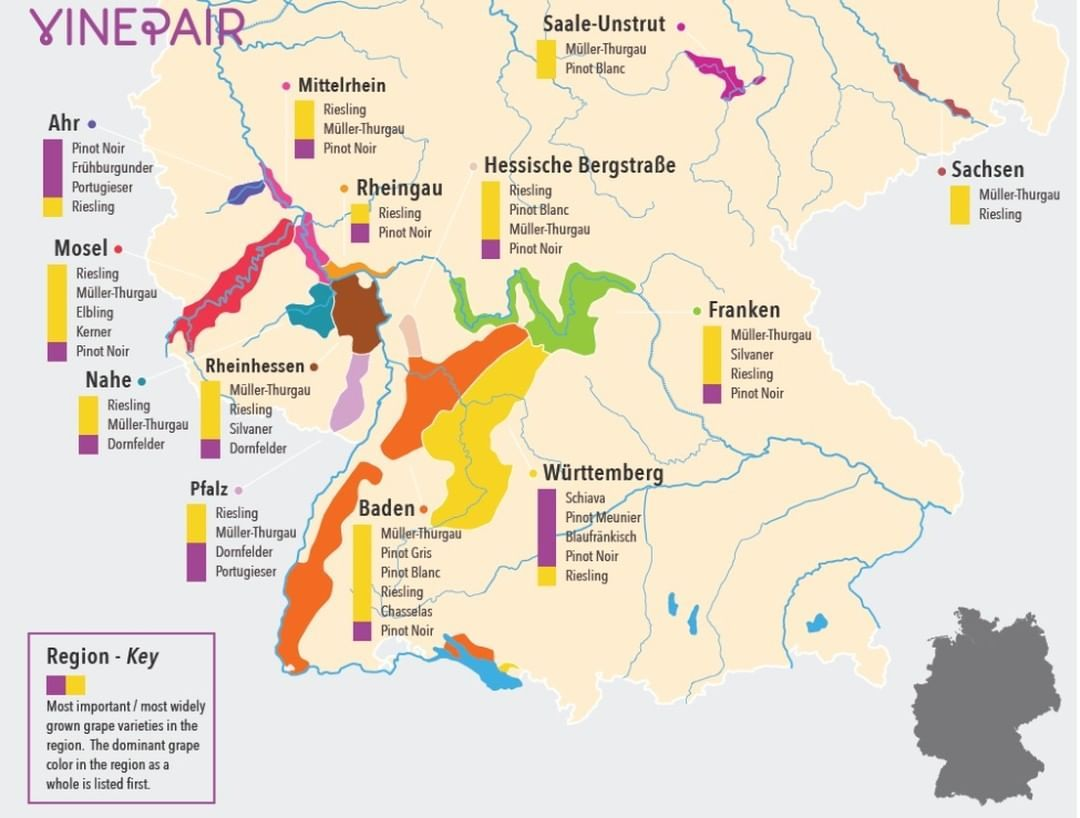

In [ ]:
Рисунок 7. Винодельческие районы Германии.

In [37]:
print(f'Средняя цена немецкого вина: {round(df1.price.mean(), 1)}')

Средняя цена немецкого вина 36.3


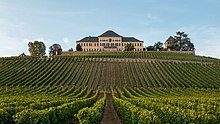

Рисунок 8. Винодельня Schloss Johannisberger

Замок Йоханнисберг - замок и винодельня в деревне Йоханнисберг к западу от Висбадена, Гессен, в винодельческом регионе Рейнгау Германии. Здесь производят вино уже более 900 лет - неудивительно, что оно самое дорогое в стране

In [197]:
taste = df1.description[11037]
taste

'With scents of dried apricots and superconcentrated pear nectar, one sniff suggests this is going to be a sumptuously sweet treat. And it is. Pear, melon and spice flavors linger elegantly on the finish, ending long and sweet.'

Вкус у самого дорого рислинга можно найти в столбце "description" исследуемого датасета: "Ароматы кураги и сверхконцентрированного грушевого нектара - роскошное сладкое лакомство.В послевкусии элегантно сохраняются ноты груши, дыни и специй, завершающиеся долго и сладко". 

Рислинг - cамый популярный сорт, на который немецкие производители сегодня делают большую ставку. Именно из него делают легендарное «ледяное вино». Он идет на многочисленные купажи. И, самое главное, идеально подходит к климатическим условиям Германии.

### Распределение  немецких сортов по ценам

In [220]:
variety_price = pd.pivot_table(data=df1,
    index=['variety', 'color'], 
    values=['price'],
    aggfunc=['min','max','mean'])
variety_price

min    max       mean
                      price  price      price
variety         color                        
Dornfelder      red    20.0   20.0  20.000000
Gewürztraminer  white  12.0   15.0  13.000000
Lemberger       red    23.0   25.0  24.000000
Müller-Thurgau  white  12.0   19.0  15.500000
Pinot Blanc     white  20.0   25.0  22.500000
Pinot Gris      white  19.0   25.0  22.000000
Pinot Noir      red    10.0   46.0  26.285714
Rieslaner       white  35.0   46.0  40.500000
Riesling        white   8.0  395.0  36.975862
Silvaner        white  18.0  177.0  54.571429
Sparkling Blend other  12.0   12.0  12.000000
Spätburgunder   white  25.0   37.0  33.250000
Weissburgunder  white  24.0   24.0  24.000000
White Blend     white  28.0   28.0  28.000000

Из таблицы можно заключить, что самая высокая средняя цена у сорта Silvaner (54,6 долл, видимо потому, что его выращивание более трудоемкое и дорогое) и Rieslaner (тоже белый, но более сладкий сорт, 36,98 долл). Самые недорогие (иходя из средней цены) - игристые сорта (12 долл), самое недооцененное - Gewürztraminer (15 долл). Подавляющее большинство немецких вин - белые.

### Распределение рейтингов по сортам (Германия)

In [218]:
variety_points = pd.pivot_table(data=df1,
    index=['variety', 'color'], 
    values=['points'],
    aggfunc=['min', 'max','mean'])
variety_points

min    max       mean
                      points points     points
variety         color                         
Dornfelder      red       89     89  89.000000
Gewürztraminer  white     89     89  89.000000
Lemberger       red       88     89  88.500000
Müller-Thurgau  white     86     90  88.000000
Pinot Blanc     white     88     91  89.500000
Pinot Gris      white     85     89  87.000000
Pinot Noir      red       82     90  85.857143
Rieslaner       white     90     93  91.500000
Riesling        white     82     97  89.089655
Silvaner        white     82     91  87.285714
Sparkling Blend other     85     85  85.000000
Spätburgunder   white     84     90  87.250000
Weissburgunder  white     89     89  89.000000
White Blend     white     87     87  87.000000

По средним рейтингам (как видно из таблицы) лидирует Rieslaner (белые сладкие сорта с медовыми нотами, рейтинг 91,5), далее Pinot Blanc (сухое белое- нестабильная мутация Пино Нуара - рейтинг 89,5) и рислинги (с рейтингом 89,1). Замыкают рейтинговую таблицу игристные сорта с рейтингом 85

In [36]:
budget1=df1[df1['price']<20]
variety1 = pd.pivot_table(data=budget1,
    index=['country', 'variety', 'color'], 
    values=['points', 'price'],
    aggfunc=['mean', 'count'])
variety1

mean             count      
                                  points      price points price
country variety         color                                   
Germany Gewürztraminer  white  89.000000  13.000000      3     3
        Müller-Thurgau  white  88.000000  15.500000      2     2
        Pinot Gris      white  85.000000  19.000000      1     1
        Pinot Noir      red    88.000000  11.500000      2     2
        Riesling        white  86.835294  14.858824     85    85
        Silvaner        white  82.000000  18.000000      1     1
        Sparkling Blend other  85.000000  12.000000      1     1

Самые популярные немецкие сорта в бюджетном сегменте до 20 долл - Рислинги (рейтинг почти 87, цена 14,9 долл). Самый высокий рейтинг у Gewürztraminer (89, цена всего 13 долл - явно недооцененный сорт при хорошем рейтинге, цена низкая), далее идет Müller-Thurgau (рейтинг 88, цена 15,5), Pinot Noir ( рейтинг 88, цена 11,5).

### ВИНА ФРАНЦИИ

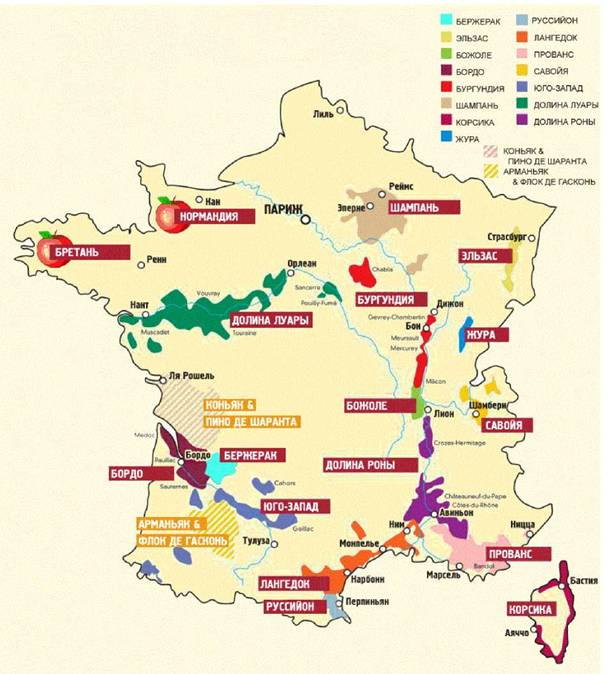

Риунок 9. Винодельческие районы Франции

In [33]:
df4=df[(df['country']=='France')]
france_price = df4.sort_values("price", ascending=False)
france_price[:4]

country                                        description  \
13188  France  A big, powerful wine that sums up the richness...   
323    France  A wine that has created its own universe. It h...   
19501  France  While there is certainly plenty of wood here, ...   
19147  France  From arguably the finest white wine vineyard i...   

          designation  points   price   province         region  \
13188         unknown      99  2300.0   Bordeaux       Pauillac   
323    Clos du Mesnil     100  1400.0  Champagne      Champagne   
19501         unknown      95   850.0   Bordeaux  Saint-Émilion   
19147         unknown      98   757.0   Burgundy     Montrachet   

                        variety            винодельня  color  color_code  
13188  Bordeaux-style Red Blend        Château Latour    red           1  
323                  Chardonnay                  Krug  white           2  
19501  Bordeaux-style Red Blend        Château Ausone    red           1  
19147                Chardonnay  Bouchard Père & Fils  white           2

Самое дорогое французское вино согласно нашему датасету - это Бордо винодельни Château Latour (2300 дол), 
далее идет Шардоне от винодельни Krug (1400 долл), затем Бордо винодельни Château Ausone (757 долл).  Дорогие сорта возделываются в основном в провинции Бордо (юго-запад страны).   

In [66]:
df4.description[13188]

"A big, powerful wine that sums up the richness of the vintage. It is densely fruity, spicy with an enormous black plum and berry fruit character to go with the acidity. It's concentrated while still showing such wonderfully pure fruit. The aging potential is immense."

Согласно данным столбца "description" самое дорогое вино исследуемого набора данных обладает следующим вкусом: "Густо-фруктовым, пряным, с огромной нотой черной сливы и ягодными фруктами, сочетающимися с кислинкой". Рейтинг 99!

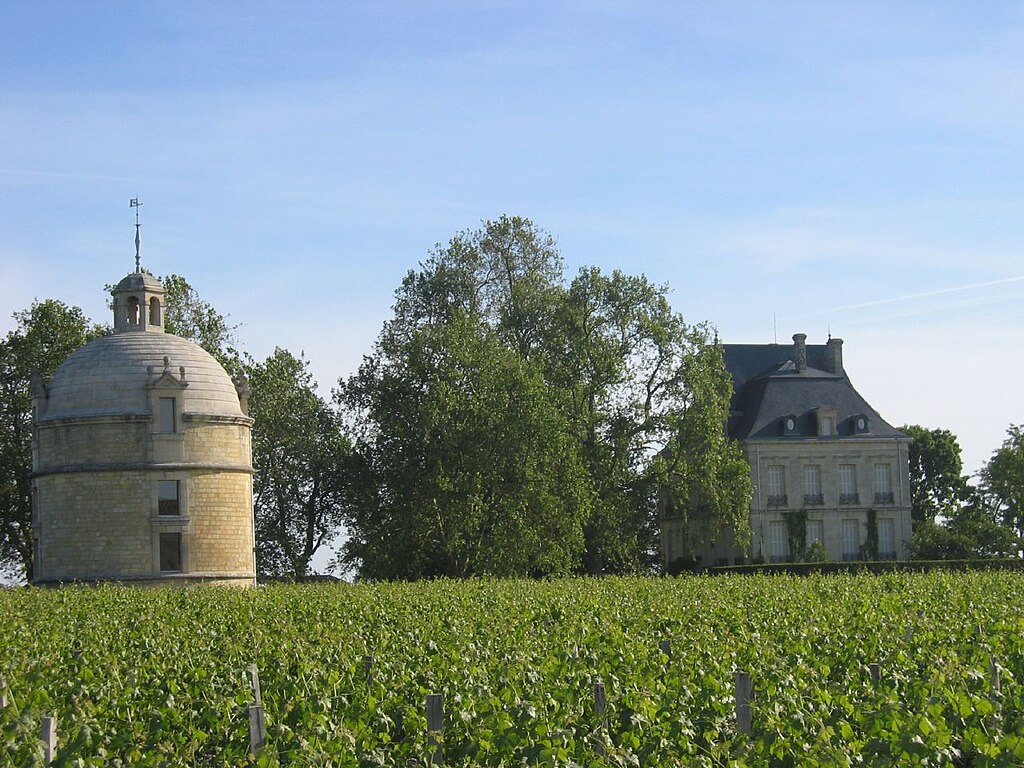

Рисунок 10. Винодельня Шато Латур региона Бордо

Винодельня Шато Латур региона Бордо известна с 14 века. 
Вино производится из винограда с собственных виноградников (80% каберне-савиньон и 20% мерло). 
Сторонний виноматериал винодельня не использует. 
Возможно, поэтому и благодаря традициям, вина, которые на ней производятся, отличаются высокой ценой и рейтингам.

In [236]:
print(f'Средняя цена французского вина: {round(df4.price.mean(), 1)} долл.')

Средняя цена французского вина: 46.8 долл.


### Распределение цен на французские сорта

In [50]:
variety_price4 = pd.pivot_table(data=df4,
    index=['variety', 'color'], 
    values=['price'],
    aggfunc=['min', 'max','mean'])
variety_price4[3:44]

min     max       mean
                                 price   price      price
variety                    color                         
Bordeaux-style Red Blend   red     7.0  2300.0  49.675781
Bordeaux-style White Blend white   9.0   240.0  32.500000
Cabernet                   red    10.0    85.0  22.388889
Cabernet Sauvignon         red    11.0    55.0  21.400000
Carignan                   red    30.0    30.0  30.000000
Champagne Blend            other  10.0   505.0  84.691589
Chardonnay                 white   6.0  1400.0  68.063380
Chenin Blanc               white  10.0    75.0  29.225000
Colombard                  white   9.0    12.0  10.000000
Colombard-Sauvignon Blanc  white  11.0    13.0  12.000000
G-S-M                      red    20.0    26.0  23.000000
Gamay                      red     8.0    42.0  16.380952
Gewürztraminer             white  20.0   210.0  50.142857
Grenache                   red    22.0    56.0  35.200000
Gros Manseng               white  14.0    14.0  14.000000
Gros and Petit Manseng     white  18.0    24.0  21.000000
Malbec                     red    10.0   140.0  29.785714
Malbec-Merlot              red    16.0    23.0  19.500000
Malbec-Tannat              red    15.0    24.0  21.750000
Marsanne                   red    13.0   145.0  65.285714
Marsanne-Roussanne         red    40.0    40.0  40.000000
Melon                      white   9.0    20.0  13.555556
Merlot                     red     7.0    20.0  12.500000
Merlot-Cabernet            red    15.0    15.0  15.000000
Mourvèdre                  red    23.0    23.0  23.000000
Muscat                     white  22.0    30.0  27.000000
Negrette                   red    12.0    19.0  15.500000
Petit Manseng              red    24.0    24.0  24.000000
Pinot Blanc                white  12.0    30.0  17.750000
Pinot Gris                 white  15.0    80.0  38.142857
Pinot Noir                 red     8.0   400.0  72.915094
Provence red blend         red    33.0    65.0  43.500000
Provence white blend       white  23.0    50.0  36.500000
Red Blend                  red     9.0   300.0  28.692308
Rhône-style Red Blend      red     8.0    75.0  28.294118
Rhône-style White Blend    white   9.0    75.0  29.043478
Riesling                   white  14.0   120.0  36.884615
Rosé                       other   8.0   100.0  20.267081
Roussanne                  white  19.0    19.0  19.000000
Sauvignon                  white   8.0   140.0  25.631068
Shiraz                     red    10.0   450.0  73.387097

По данным таблицы, самая высокая средняя цена у Шампанского (84,7 долл), далее с отрывом идут 
красные сорта Шираз (73,4) и Пино Нуар (72,9 долл). 
Самая низкая средняя цена у Colombard (белое столовое вино, известное с 18 века, стоимостью всего 10 долл),  
Мерло (красное, идущее чаще всего на купажи, 12,5 долл)  

### Распределение рейтингов по сортам (Франция)

In [62]:
variety_points4 = pd.pivot_table(data=df4,
    index=['variety', 'color'], 
    values=['points'],
    aggfunc=['min', 'max','mean'])
variety_points4[3:49]

min    max       mean
                                 points points     points
variety                    color                         
Bordeaux-style Red Blend   red       80     99  88.292969
Bordeaux-style White Blend white     83     97  88.388889
Cabernet                   red       84     90  87.666667
Cabernet Sauvignon         red       85     94  88.600000
Carignan                   red       90     90  90.000000
Champagne Blend            other     82     97  90.121495
Chardonnay                 white     81    100  89.426056
Chenin Blanc               white     82     95  89.400000
Colombard                  white     86     87  86.333333
Colombard-Sauvignon Blanc  white     84     85  84.500000
G-S-M                      red       88     91  89.500000
Gamay                      red       83     92  86.785714
Gewürztraminer             white     82     94  88.857143
Grenache                   red       87     92  90.200000
Gros Manseng               white     89     89  89.000000
Gros and Petit Manseng     white     91     92  91.500000
Malbec                     red       84     93  88.452381
Malbec-Merlot              red       86     92  89.833333
Malbec-Tannat              red       86     93  91.000000
Marsanne                   red       85     95  90.285714
Marsanne-Roussanne         red       90     90  90.000000
Melon                      white     81     92  86.555556
Merlot                     red       82     90  85.428571
Merlot-Cabernet            red       84     84  84.000000
Mourvèdre                  red       89     89  89.000000
Muscat                     white     83     90  87.600000
Negrette                   red       87     88  87.500000
Petit Manseng              red       94     94  94.000000
Pinot Blanc                white     82     90  86.950000
Pinot Gris                 white     83     95  89.666667
Pinot Noir                 red       81     98  89.495283
Provence red blend         red       91     93  92.000000
Provence white blend       white     88     91  89.500000
Red Blend                  red       82     93  87.410256
Rhône-style Red Blend      red       82     93  88.494118
Rhône-style White Blend    white     84     92  87.478261
Riesling                   white     83     96  89.634615
Rosé                       other     83     94  87.670807
Roussanne                  white     88     88  88.000000
Sauvignon                  white     82     94  87.621359
Shiraz                     red       81     96  89.516129
Sparkling Blend            other     82     90  86.535714
Sylvaner                   white     90     90  90.000000
Syrah-Grenache             red       87     87  87.000000
Sémillon                   white     86     86  86.000000
Tannat                     red       88     95  90.833333

Самый высокий средний рейтинг оказался у Petit Manseng (зеленовато-белый сладкий сорт с рейтингом 94), 
далее идет купаж красных сортов Provence red blend (92) и купаж Gros and Petit Manseng 
(рейтинг 91,5, обладает вкусом экзотических фруктов, маракуйи и ананаса с тонами айвы). 
Самый низкий рейтинг у красного Merlot-Cabernet (84). 

In [354]:
budget4=df4[df4['price']<20]
variety4 = pd.pivot_table(data=budget4,
    index=['variety', 'color'], 
    values=['points', 'price'],
    aggfunc=['mean', 'count'])
variety4

mean             count      
                                     points      price points price
variety                    color                                   
Aligoté                    white  86.333333  15.666667      3     3
Alsace white blend         white  88.000000  14.333333      3     3
Bordeaux-style Red Blend   red    86.758242  14.967033     91    91
Bordeaux-style White Blend white  86.466667  13.900000     30    30
Cabernet                   red    87.600000  16.100000     10    10
Cabernet Sauvignon         red    87.250000  13.000000      4     4
Champagne Blend            other  86.000000  12.000000      3     3
Chardonnay                 white  85.750000  14.340909     44    44
Chenin Blanc               white  86.800000  14.000000     15    15
Colombard                  white  86.333333  10.000000      3     3
Colombard-Sauvignon Blanc  white  84.500000  12.000000      2     2
Gamay                      red    86.187500  13.343750     32    32
Gros Manseng               white  89.000000  14.000000      1     1
Gros and Petit Manseng     white  92.000000  18.000000      1     1
Malbec                     red    86.818182  14.818182     22    22
Malbec-Merlot              red    90.500000  17.000000      2     2
Malbec-Tannat              red    86.000000  15.000000      1     1
Marsanne                   red    85.000000  13.000000      1     1
Melon                      white  85.875000  12.750000      8     8
Merlot                     red    85.384615  11.923077     13    13
Merlot-Cabernet            red    84.000000  15.000000      1     1
Negrette                   red    87.500000  15.500000      2     2
Pinot Blanc                white  87.000000  14.000000     13    13
Pinot Gris                 white  84.666667  15.666667      3     3
Pinot Noir                 red    84.800000  14.750000     20    20
Red Blend                  red    86.772727  15.318182     22    22
Rhône-style Red Blend      red    87.060606  14.606061     33    33
Rhône-style White Blend    white  86.300000  13.100000     10    10
Riesling                   white  86.916667  16.250000     12    12
Rosé                       other  86.553191  13.723404     94    94
Roussanne                  white  88.000000  19.000000      1     1
Sauvignon                  white  85.625000  13.218750     32    32
Shiraz                     red    84.666667  12.416667     12    12
Sparkling Blend            other  85.769231  13.461538     13    13
Sylvaner                   white  90.000000  16.000000      1     1
Syrah-Grenache             red    87.000000  10.000000      1     1
Tannat                     red    90.666667  15.666667      3     3
Tannat-Cabernet            red    88.500000  13.750000      4     4
White Blend                white  85.823529  12.117647     17    17

Согласно данным таблицы, самые популярные сорта вина в сегменте до 20 долл это: Rose (рейтинг почти 87), Bordeaux-style Red Blend с тем же рейтингом, Chardonnay (рейтинг почти 86), Rhône-style Red Blend (87), Sauvignon (85,6), Gamay (86,2). 

#  <a name="3">3. Структура развития рынка вина Франции, Германии, Австрии и Венгрии

### Проанализируем рынок вин стран 48 параллели: Франции, Германии, Австрии и Венгрии

In [98]:
df5=df[(df['country']=='France')|(df['country']=='Germany')|(df['country']=='Austria')|(df['country']=='Hungary')]

### Самые популярные вина 

In [264]:
varieties_list = pd.DataFrame(df5.variety.value_counts(dropna = True)).iloc[0:9]
varieties_list

count
variety                        
Riesling                    396
Chardonnay                  290
Bordeaux-style Red Blend    259
Pinot Noir                  230
Rosé                        166
Sauvignon Blanc             120
Grüner Veltliner            118
Champagne Blend             107
Rhône-style Red Blend        85

По количественным показателям лидируют Рислинги, далее идут Шардоне, Bordeaux-style Red Blend и Пино Нуар.

Text(0.5, -0.1, 'Рисунок 11. Популярные сорта винограда')

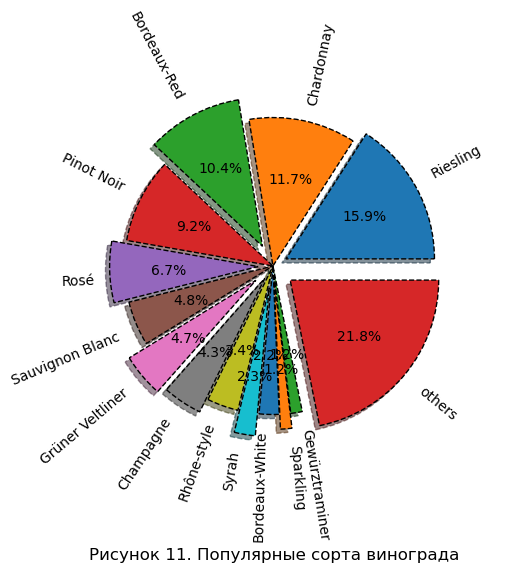

In [100]:
vals = [396, 290, 259, 230, 166, 120, 118, 107, 85, 57, 54, 31, 31, 543] 
labels = ['Riesling', 'Chardonnay', 'Bordeaux-Red', 'Pinot Noir', 'Rosé', 'Sauvignon Blanc', 'Grüner Veltliner',
'Champagne', 'Rhône-style', 'Syrah', 'Bordeaux-White','Sparkling', 'Gewürztraminer','others'] 
explode = (0.1, 0, 0.15, 0, 0.1, 0, 0.15, 0.1, 0, 0.15, 0, 0.1, 0, 0.15) 
fig, ax = plt.subplots() 
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, 
       wedgeprops={'lw':1, 'ls':'--', 'edgecolor':'k'}, rotatelabels=True) 
ax.axis('equal')
ax.set_title('Рисунок 11. Популярные сорта винограда',y=-0.1,pad=-50)

Исходя из рисунка 11, самые распространенные сорта в исследуемых странах - Рислинги (почти 16%), что возможно связано с тем, что белые сорта винограда лучше всего приживаются в холодном климате (красные же любят тепло и солнце).  Шардоне (почти 12%) - тоже белый неприхотливый сорт, его выращивают по всему миру, на разных почвах и в разных климатических условиях. Во Франции он распространен в Шампани, где составляет около трети посадок, на родине в Бургундии, в соседней Жюре, в Долине Луары и Лангедоке. Используется как для игристых, так и для тихих вин. «Король» среди сортов винограда (капризный и непредсказуемый, сложный в культивации) Пино Нуар замыкает тройку популярности (9,2%)

### Распределение самых популярных сортов винограда по анализируемым странам:

In [203]:
df5.groupby('country').variety.apply(lambda x:x.value_counts().nlargest(5))

country                          
Austria  Grüner Veltliner            118
         Riesling                     54
         Zweigelt                     26
         Blaufränkisch                23
         Sauvignon Blanc              16
France   Chardonnay                  283
         Bordeaux-style Red Blend    256
         Pinot Noir                  211
         Rosé                        161
         Champagne Blend             107
Germany  Riesling                    290
         Silvaner                      7
         Pinot Noir                    7
         Spätburgunder                 4
         Gewürztraminer                3
Hungary  Tokaji                       13
         Cabernet Franc                3
         Furmint                       3
         Red Blend                     2
         Bordeaux-style Red Blend      2
Name: variety, dtype: int64

Судя по таблице, самые популярные французские сорта: Шардоне, Bordeaux-style Red Blend и Пино Нуар, 
среди австрийских вин самое популярное Grüner Veltliner, далее идут Рислинговые сорта, 
В Германии они самые популярные. В Венгрии лидируют Токайские - с большим отрывом.

### Визуализация рейтингов вина по странам, сортам винограда, по ценам

Text(0.5, 0, '')

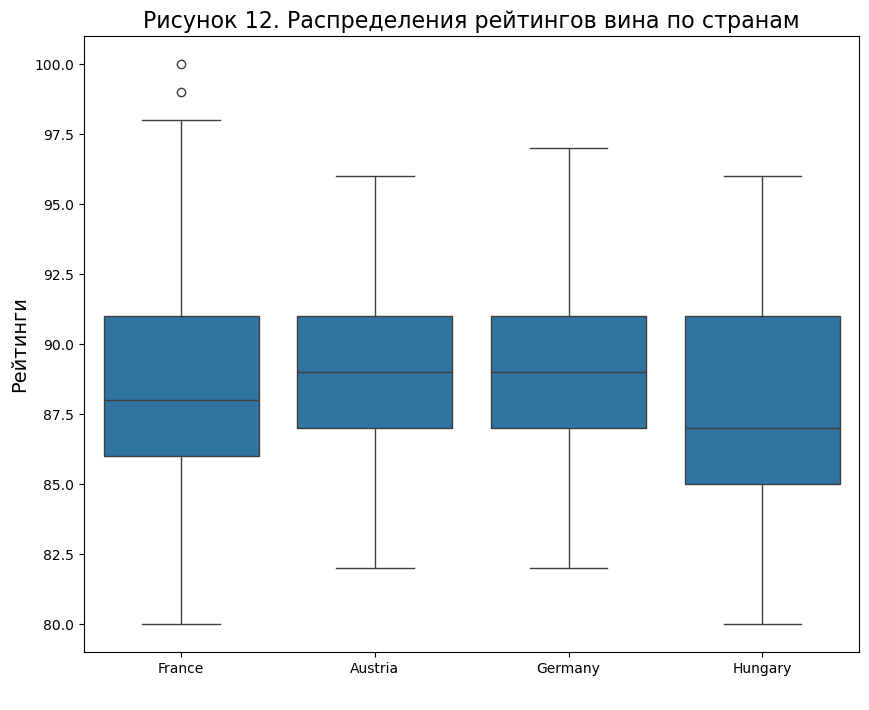

In [105]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(x = df5.country,y = df5.points)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Рейтинги', fontsize=14)
plt.title('Рисунок 12. Распределения рейтингов вина по странам',fontsize=16)
plt.figtext(0.5, 0, "" )

Исходя из графика 12 максимальные рейтинги выше у французских вин, медианные - у вин Австрии и Германии. Распределение рейтингов венгерских вин отличается широким межквартильным диапазоном и более низкой медианой

In [115]:
price_country = pd.pivot_table(data=df5,
    index=['country'], 
    values=['points', 'price'],
    aggfunc=['min', 'max','mean'])
price_country

min          max               mean           
        points price points   price     points      price
country                                                  
Austria     82   8.0     96  1100.0  89.056604  32.113208
France      80   6.0    100  2300.0  88.657474  46.765582
Germany     82   8.0     97   395.0  88.932308  36.289231
Hungary     80   7.0     96   764.0  87.838710  64.774194

Максимальные значения рейтингов закономерно у Франции, минимальные - у Венгрии. Максимальные цены опять же у французских вин, минимальные у венгерских. А вот средние цены распределились иначе: венгерские вина оцениваются в среднем дороже всех - 64,8 долл, далее идут французские - 46,8, средние цены немецких и австрийских вин практически одинаковы: 36,3 и 32,1 соответственно.

Text(0.5, 0, '')

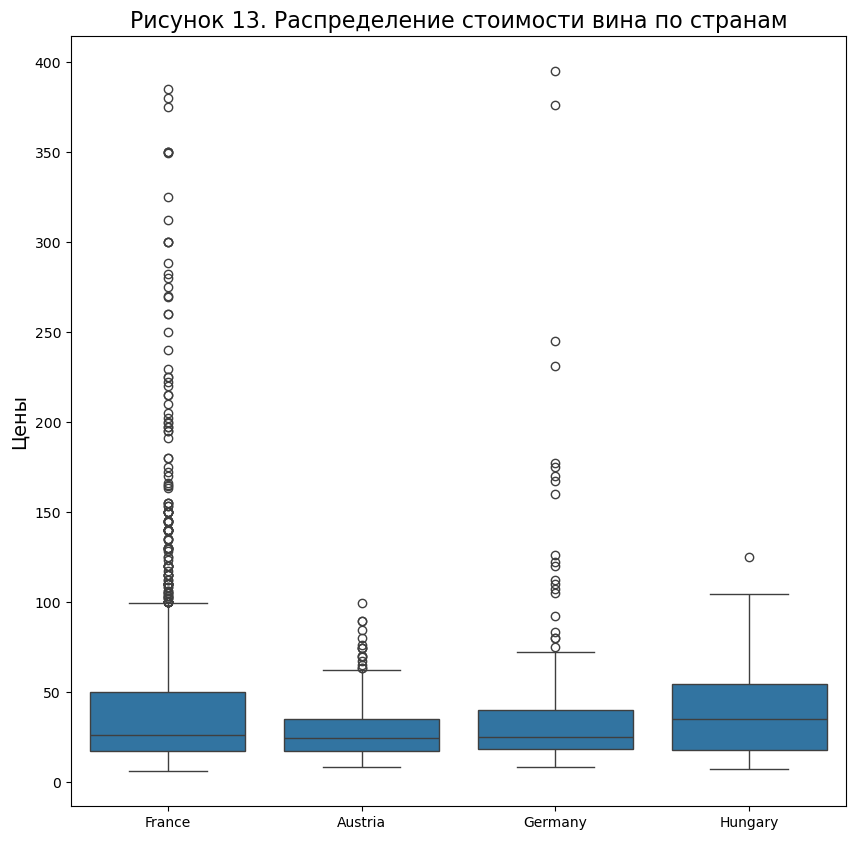

In [111]:
df6=df5.loc[df5['price']<400]
fig = plt.figure(figsize=(10,10))
sns.boxplot(x = df6.country,y = df6.price)
plt.xlabel(' ', fontsize=14)
plt.ylabel('Цены', fontsize=14)
plt.title('Рисунок 13. Распределение стоимости вина по странам',fontsize=16)
plt.figtext(0.5, 0, "" )

Судя по графику 13, распределение стоимости вина между странами отличается незначительно. Для Франции характерны довольно большие ценовые выбросы. Стоимость австрийских и венгерских вин распределена более равномерно. Медианная стоимость и межквартильный диапазон венгерских вин выше, чем остальных

Text(0.5, 1.0, 'Рисунок 14. Распределение рейтингов по сортам винограда')

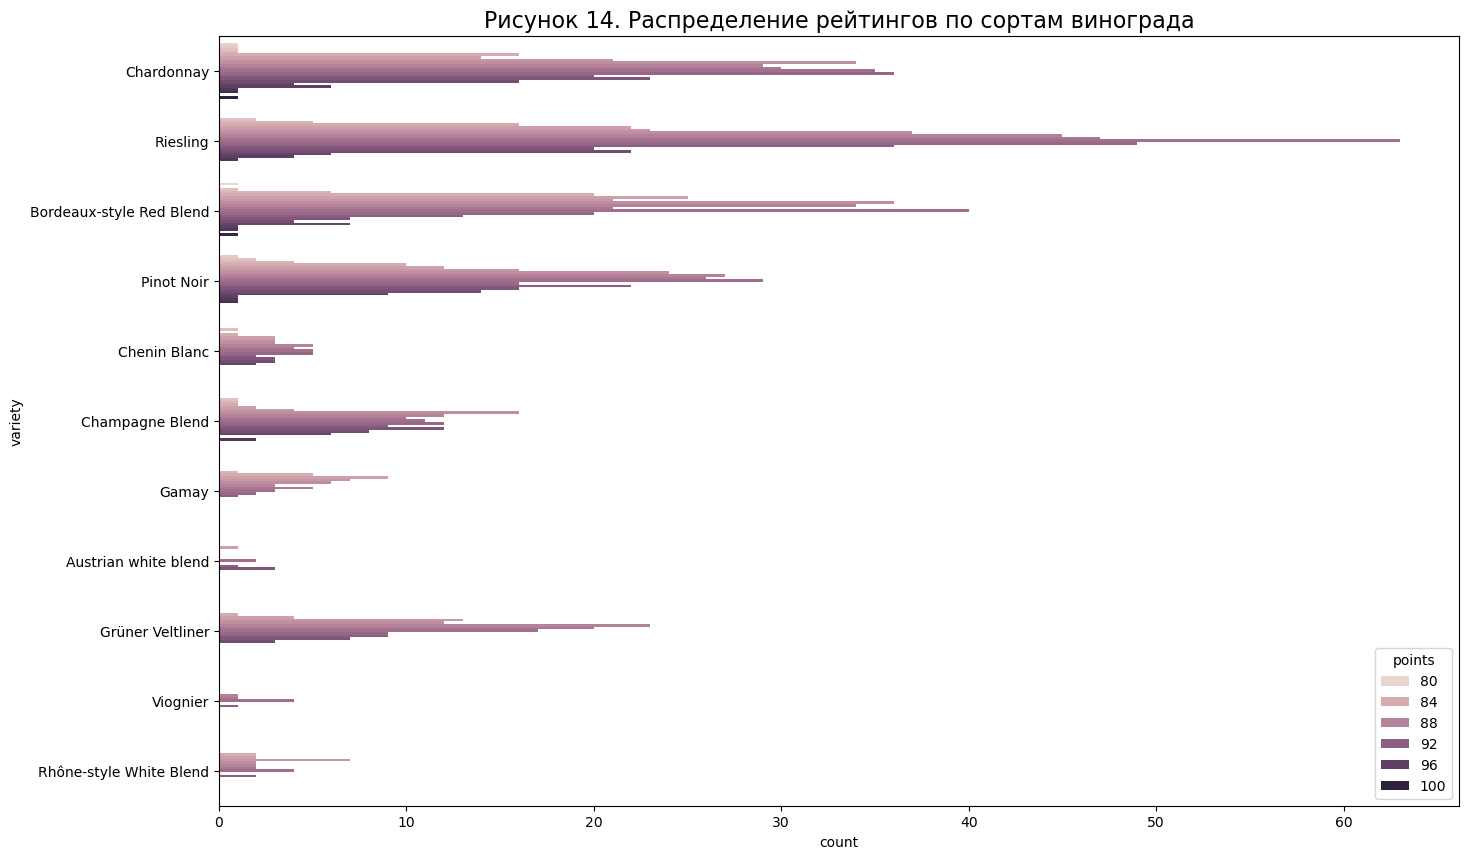

In [114]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(y='variety', data=df5, hue='points', order=df5['variety'][:20].value_counts(ascending = False).index)
plt.title('Рисунок 14. Распределение рейтингов по сортам винограда', fontsize=16)

Исходя из рисунка 14, самые высокие рейтинги у сортов Шардоне, Бордо, Пино Нуар и Рислингов. Остальные сорта сильно отстают

Text(0.5, 0, '')

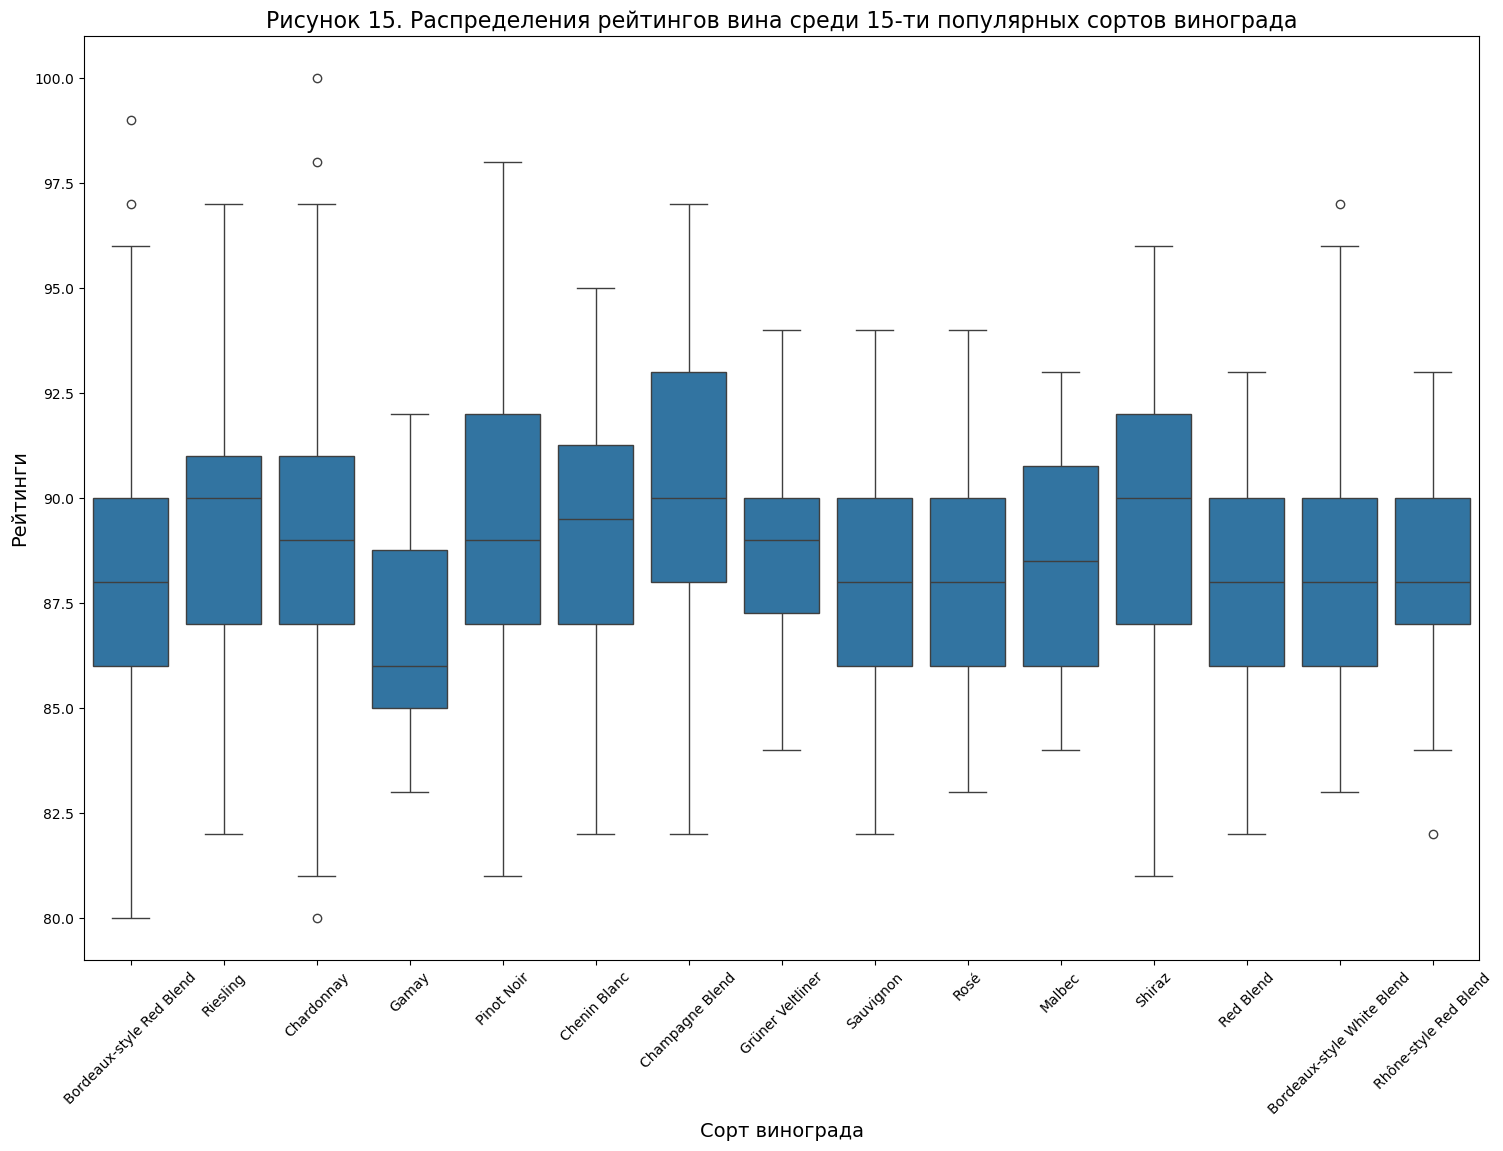

In [117]:
fig = plt.figure(figsize=(18,12))
top_reviewed_wines = df5.variety.value_counts().head(15)
points_top_reviewed_wines = df5[df5.variety.isin(top_reviewed_wines.index)]
sns.boxplot(x = points_top_reviewed_wines.variety,y = points_top_reviewed_wines.points)
plt.xticks(rotation = 45)
plt.xlabel('Сорт винограда', fontsize=14)
plt.ylabel('Рейтинги', fontsize=14)
plt.title('Рисунок 15. Распределения рейтингов вина среди 15-ти популярных сортов винограда',fontsize=16)
plt.figtext(0.5, 0, "" )

Судя по рисунку 15, максимальные рейтинги у сортов Шардоне, Бордо, Пино Нуар. Самые высокие медианные рейтинги у Рислингов и Шампанских. Самый низкий медианный рейтинг у черного толстостенного винограда сорта Gamay 

In [264]:
color5 = df5.color.value_counts()
color5[:9]

color
white    1296
red       887
other     304
Name: count, dtype: int64

Text(0.5, -0.1, 'Рисунок 16. Соотношение красных и белых сортов в сранах 48 параллели')

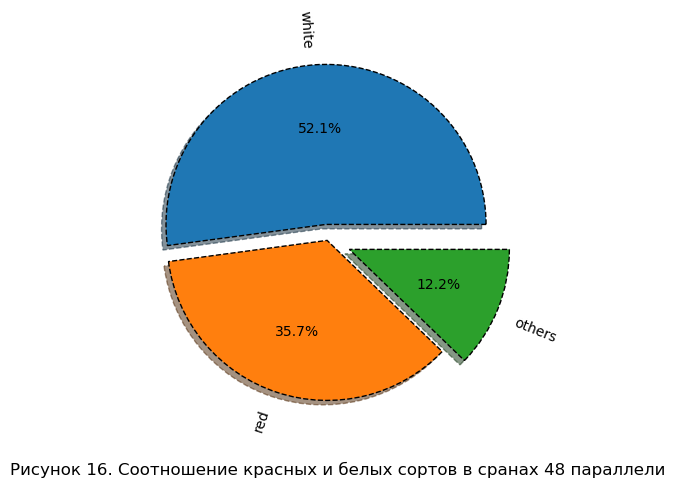

In [120]:
vals = [1296, 887, 304] 
labels = ['white', 'red', 'others'] 
explode = (0.1, 0, 0.15) 
fig, ax = plt.subplots() 
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, 
       wedgeprops={'lw':1, 'ls':'--', 'edgecolor':'k'}, rotatelabels=True) 
ax.axis('equal')
ax.set_title('Рисунок 16. Соотношение красных и белых сортов в сранах 48 параллели',y=-0.1,pad=-15)

Судя по рисунку 16, в анализируемых регионах белые сорта преобладают - их более 52%, красных - почти 36%. Видимо, это связано с климатическими условиями 48 параллели

In [247]:
designation5 = df5.designation.value_counts()
designation5[:9]

designation
unknown            622
Vieilles Vignes     19
Brut                17
Réserve             16
Reserve             12
Trocken             12
Classic             12
Nouveau             10
Brut Rosé           10
Name: count, dtype: int64

Если рассматривать признак "географическое наименование", то чаще всего это Réserve и Reserve. Раньше этот термин был строго определен по сроку выдержки вина в дубовых бочках (не менее 2-3 лет) и % алкоголя - по меньшей мере на 0,5 выше легального минимума. На сегодняшний день во всех вышеназванных странах это не регламентируется законодательно. Каждая винодельня вкладывает свой смысл в термин, зачастую обозначая им качественное дорогое вино и используя как маркетинговый ход. Поэтому сравнивать вина по данному критерию бессмысленно.
В остальном по специальным наименованиям среди рассмотренных вин самые популярные: купажи (Vieilles Vignes), Брюты(Brut), сухие вина (Trocken), классические сортовые (Classic) и молодые вина (Nouveau)

### Распределение цен по рейтингам вина

Text(0, 0.5, 'цены')

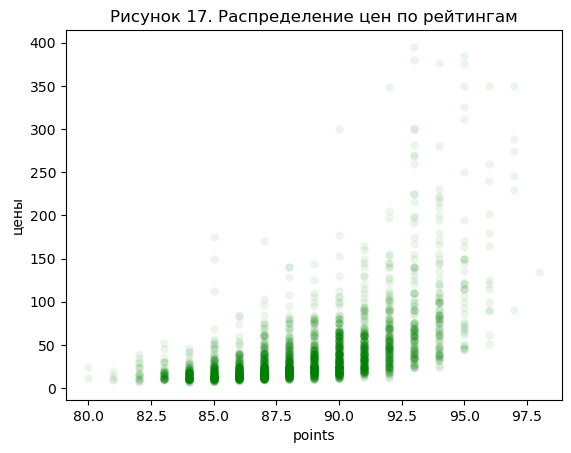

In [125]:
plt.scatter(df6['points'], df6['price'], lw=0, alpha=.08, color='g')
plt.xlabel("points")
plt.title("Рисунок 17. Распределение цен по рейтингам")
plt.ylabel("цены")

На графике 17 прослеживается довольно четкая зависимость цен от рейтингов вина

Text(0.5, 1.0, 'Рисунок 18. Тепловой график исследуемого набора данных')

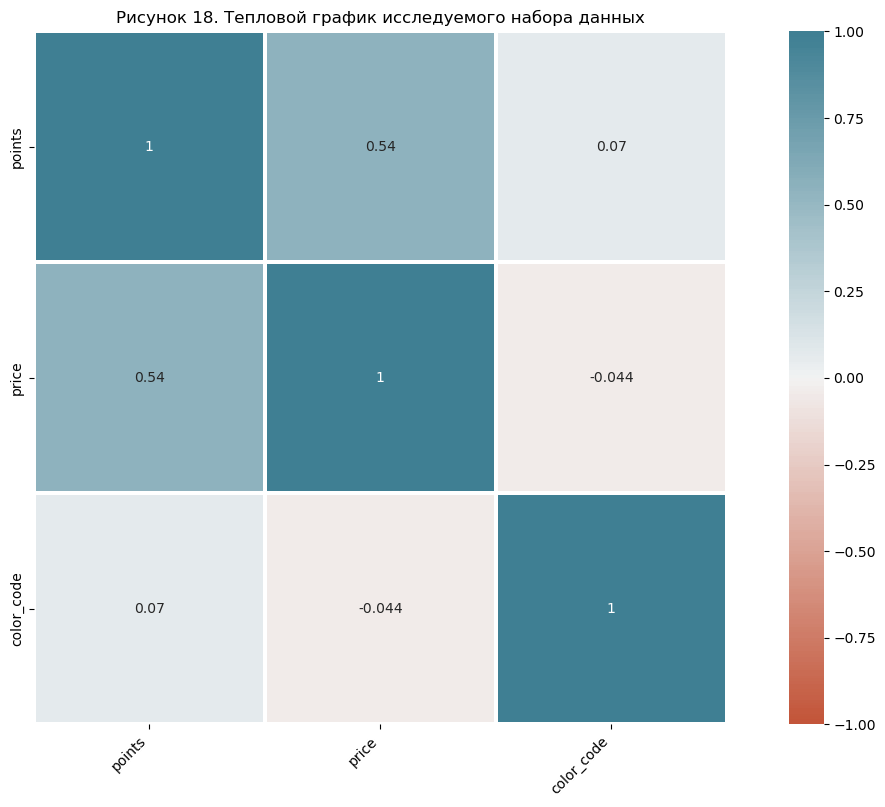

In [128]:
corr =df6.corr(numeric_only=True)
plt.figure(figsize = (16, 9))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    annot = True,
    annot_kws={'fontsize' : 10},
    linewidths = 1.5,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.title("Рисунок 18. Тепловой график исследуемого набора данных")

На тепловом графике отчетливо прослеживается корреляция между ценой и рейтингом вина. Между рейтингом и цветом, между цветом и ценой корреляция практически отсутствует.

#  <a name="4"> 4. Исследование статистических показателей зависимости цены вина от рейтинга в регионах.</a>

### РЕГРЕССИОННАЯ модель зависимости цены от рейтинга французских вин

Рассмотрим цены и рейтинги французских вин, причем уберем из выборки единичные высокие цены (более 500 долл)

In [165]:
from scipy import (misc, stats, ndimage)
import numpy as np
import matplotlib.pyplot as plt

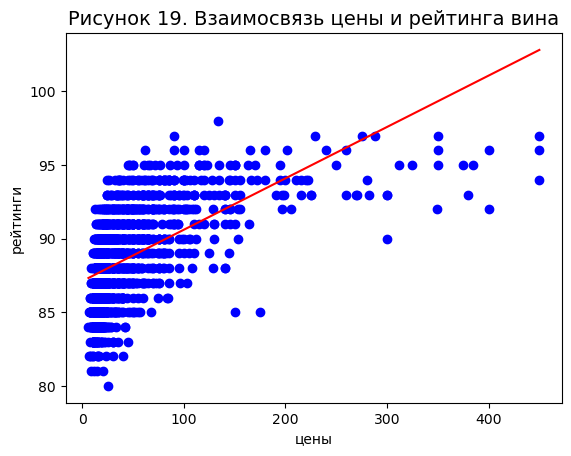

LinregressResult(slope=0.03488637389169612, intercept=87.12229418203603, rvalue=0.5672431399537198, pvalue=2.6579838122935803e-154, stderr=0.001192500256968335, intercept_stderr=0.07836937956257316)

In [323]:
df4=df4.loc[df4['price']<500]
x=df4["price"]
y=df4["points"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию

plt.title("Рисунок 19. Взаимосвязь цены и рейтинга вина",fontsize=14)
plt.xlabel("цены")
plt.ylabel("рейтинги")

plt.show()
stats.linregress (x, y)

In [220]:
print(r_value, p_value, std_err)

0.5672431399537198 2.6579838122935803e-154 0.001192500256968335


In [222]:
import statsmodels.formula.api as smf
model_linear_ols = smf.ols(formula='price ~ points', data=df4)
result_linear_ols = model_linear_ols.fit()
print(result_linear_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     855.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          2.66e-154
Time:                        14:22:36   Log-Likelihood:                -9263.2
No. Observations:                1806   AIC:                         1.853e+04
Df Residuals:                    1804   BIC:                         1.854e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -774.3203     27.958    -27.696      0.0

R-squared=0.322, Adj. R-squared=0.321, F-statistic=855.8, P=0.00, coef Intercept=-774.32, coef points=9.22 
Исходя из коэффициентов, наше уравнение выглядит следующим образом: y = 9.22*points-774.32
Созданная регрессионная модель для французских вин объясняется на 32,1%. Показатели все значимые. 
Модель довольно посредственно описывает зависимость цены от рейтинга. 
Однако оценить по рейтингам, что вино хорошее возможно. 

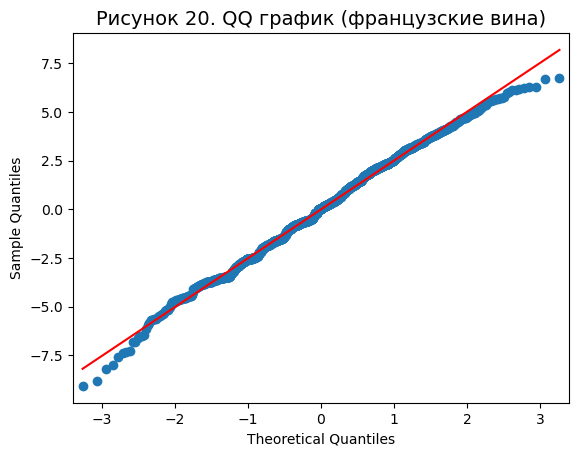

In [325]:
import statsmodels.api as sm
X = df4['price']
y = df4['points']
x1 = sm.add_constant(X)
lr = sm.OLS(y, x1).fit()
sm.qqplot(lr.resid, line='s')
plt.title("Рисунок 20. QQ график (французские вина)",fontsize=14);

Судя по графику выборочные квантили не слишком сильно отличаются от теоретических. 
Синие точки находятся недалеко от красной прямой. В хвостах есть заметный шум, но центральная часть распределения
довольно неплохо совпадает.

### Создадим квадратичные функции

In [329]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
X = df4[['points']].values
y = df4['price'].values
reg = linear_model.LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
from sklearn.metrics import r2_score
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

### Рассмотрим полиноминальные модели распределения цен по рейтингам французских вин. 

Text(0.5, 1.0, 'Рисунок 21. Полиноминальные модели зависимости цен от рейтингов')

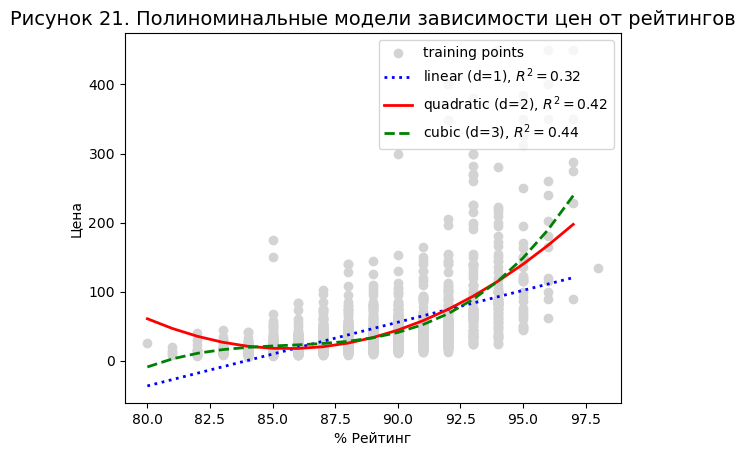

In [331]:
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')
plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red', 
         lw=2,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green', 
         lw=2, 
         linestyle='--')
plt.xlabel('% Рейтинг')
plt.ylabel('Цена')
plt.legend(loc='upper right')
plt.title("Рисунок 21. Полиноминальные модели зависимости цен от рейтингов",fontsize=14)

Как видно из графика, полиноминальные модели лучше описывают исследуемую зависимость. При степени мощности 3, R-squared равен уже 0,44

Добавим признак "color_code" в регрессионную модель:

In [189]:
import statsmodels.formula.api as smf
results = smf.ols('price ~ points + color_code', data=df4).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     429.2
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          3.61e-153
Time:                        13:22:49   Log-Likelihood:                -9262.2
No. Observations:                1806   AIC:                         1.853e+04
Df Residuals:                    1803   BIC:                         1.855e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -773.2067     27.961    -27.653      0.000    -828.046    -718.367
points         9.2371      0.315     29.293      0.000       8.619       9.856
color_code    -1.9235      1.363     -1.411      0.158      -4.597       0.750
==============================================================================
Omnibus:                     1465.629   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38808.428
Skew:                           3.680   Prob(JB):                         0.00
Kurtosis:                      24.484   Cond. No.                     2.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared=0.323 (было 0.322), показатель Adj. R-squared = 0.322(было 0.321). Модель не улучшилась

Корреляция между рейтингами вина и логарифмом цены вина определенно подтверждается. 
Линейная комбинация переменных может дать прямую линию, но эта линия не вполне соответствует данным. 
Выявлена тенденция того, что чем выше рейтинг, тем больше цена вина. 
Взаимосвязь между двумя количественными переменными лучше отражается на точечной диаграмме. 
График использует точки в качестве отметки для представления корреляции и позицию 
в качестве канала для репрезентации тренда.

Text(0.5, 0, '')

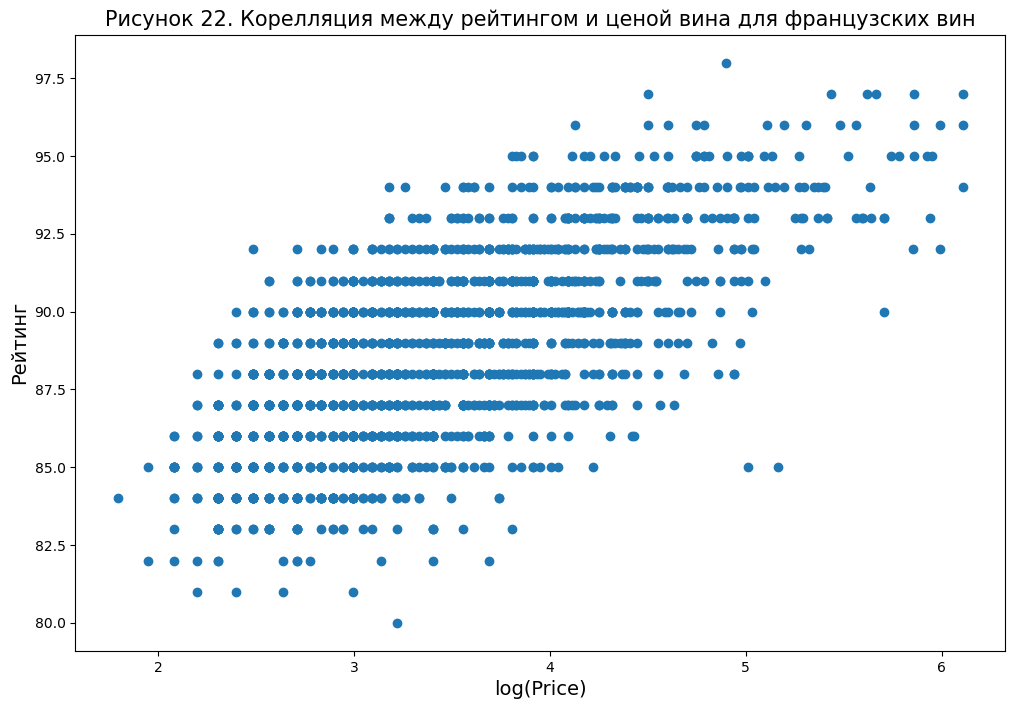

In [333]:
fig = plt.figure(figsize=(12,8))
xx = np.log(df4.price)
yy = df4.points
plt.scatter(xx,yy)
plt.xlabel('log(Price)', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.title('Рисунок 22. Корелляция между рейтингом и ценой вина для французских вин',fontsize=15)
plt.figtext(0.5, 0, "" )

### Зависимость цен от рейтингов немецких вин

In [335]:
import statsmodels.api as sm
X = df1['price']
y = df1['points']
x1 = sm.add_constant(X)
lr = sm.OLS(y, x1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     77.44
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           8.39e-17
Time:                        15:12:42   Log-Likelihood:                -761.40
No. Observations:                 325   AIC:                             1527.
Df Residuals:                     323   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.8453      0.187    470.225      0.0

R-squared=0.193, Adj. R-squared= 0.191, F-statistic=77.44, P=0.00, coef const=-537.91, coef points=6.46 
Исходя из коэффициентов, наше уравнение выглядит следующим образом: y = 6.46*points-537.91   
Созданная нами регрессионная модель для немецких вин более неудачна, чем для французских 
- она довольно плохо описывает зависимость цены от рейтинга.

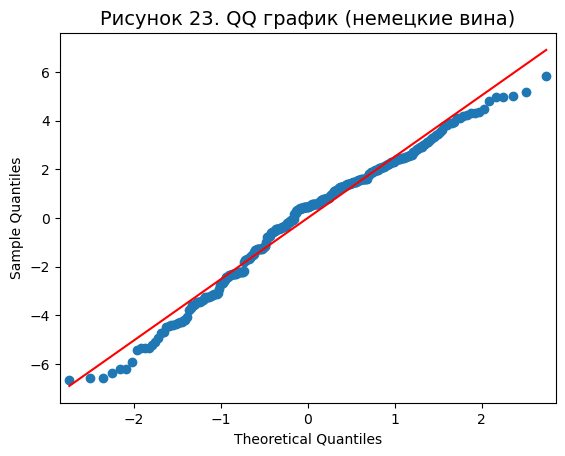

In [337]:
X = df1['price']
y = df1['points']
sm.qqplot(lr.resid, line='s')
plt.title('Рисунок 23. QQ график (немецкие вина)',fontsize=14);

Судя по графику выборочные квантили отличаются от теоретических сильнее, чем при анализе французских вин. 
Синие точки находятся дальше от красной прямой. Центральная часть распределения хуже совпадает в случае немецких вин.

### Зависимость цен от рейтингов австрийских вин 

In [339]:
import statsmodels.api as sm
df2=df2.loc[df2['price']<100]
X = df2['points']
y = df2['price']
x1 = sm.add_constant(X)
lr = sm.OLS(y, x1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           2.44e-31
Time:                        15:12:48   Log-Likelihood:                -1268.7
No. Observations:                 317   AIC:                             2541.
Df Residuals:                     315   BIC:                             2549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -328.3496     27.415    -11.977      0.0

Из таблицы: R-squared=0.35, Adj. R-squared=0.348, F-statistic=169.8, P=0.00, coef const=-328.35, coef points=4.01 
Исходя из коэффициентов, наше уравнение выглядит следующим образом: y = 4,01*points-328,35
Созданная регрессионная модель для австрийских вин объясняется на 35%. Показатели все значимые. 
Модель довольно посредственно описывает зависимость цены от рейтинга. 
Однако сказать, что чем выше рейтинг, тем выше цена возможно. 

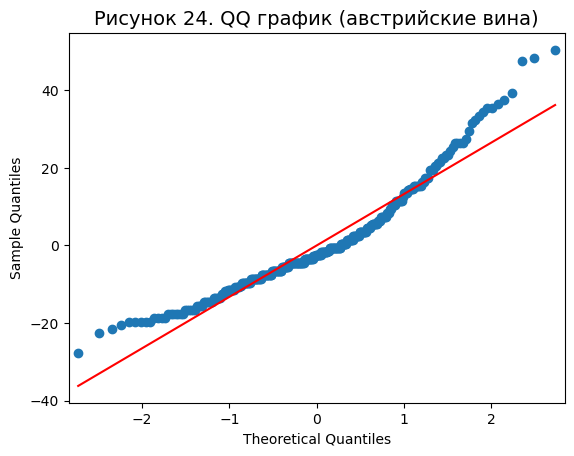

In [341]:
X = df2['price']
y = df2['points']
sm.qqplot(lr.resid, line='s')
plt.title('Рисунок 24. QQ график (австрийские вина)',fontsize=14);

Судя по графику выборочные квантили отличаются от теоретических сильнее, чем при анализе французских вин. Заметный шум в хвостах графика выше, чем при анализе немецких. Центральная часть распределения тоже отличается сильнее.

### Зависимость цен от рейтингов венгерских вин

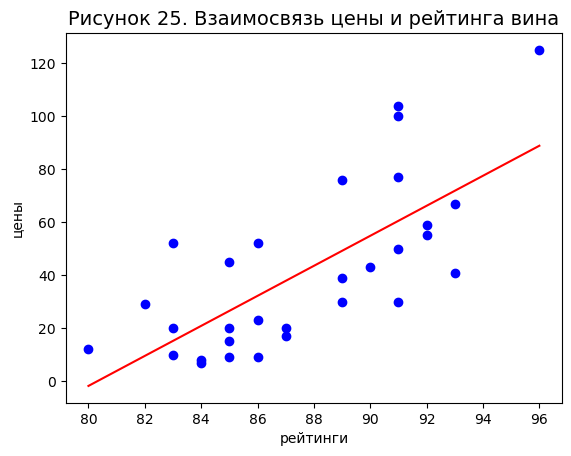

LinregressResult(slope=5.663685416512677, intercept=-454.86096533372756, rvalue=0.7195006690255125, pvalue=7.438799356815992e-06, stderr=1.0331324308003962, intercept_stderr=90.62540477873256)

In [343]:
df3=df3.loc[df3['price']<200]
x=df3["points"]
y=df3["price"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

plt.plot(x,y,'ob') #Рассталяем точки
plt.plot(x1,y1,'-r') #Рисуем линию

plt.title("Рисунок 25. Взаимосвязь цены и рейтинга вина",fontsize=14)
plt.xlabel("рейтинги")
plt.ylabel("цены")

plt.show()
stats.linregress (x, y)

На Рисунке 25 видно, что ценовые выбросы достаточно велики, однако в целом значения переменной близки к красной прямой.

In [283]:
print(r_value, p_value, std_err)

0.7195006690255125 7.438799356815992e-06 1.0331324308003962


In [345]:
df3=df3.loc[df3['price']<200]
X = df3['points']
y = df3['price']
x1 = sm.add_constant(X)
lr = sm.OLS(y, x1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     30.05
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           7.44e-06
Time:                        15:13:14   Log-Likelihood:                -134.18
No. Observations:                  30   AIC:                             272.4
Df Residuals:                      28   BIC:                             275.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -454.8610     90.625     -5.019      0.0

R-squared=0.518, Adj. R-squared=0.500, F-statistic=30.05, P=0.00, coef const=-454.86, coef points=5.66 
Исходя из коэффициентов, наше уравнение выглядит следующим образом: y = 5,66*points-454,86
Созданная регрессионная модель для венгерских вин объясняется на 51,8%. Показатели все значимые. 
Модель лучше описывает зависимость цены от рейтинга, чем в предыдущих случаях. 

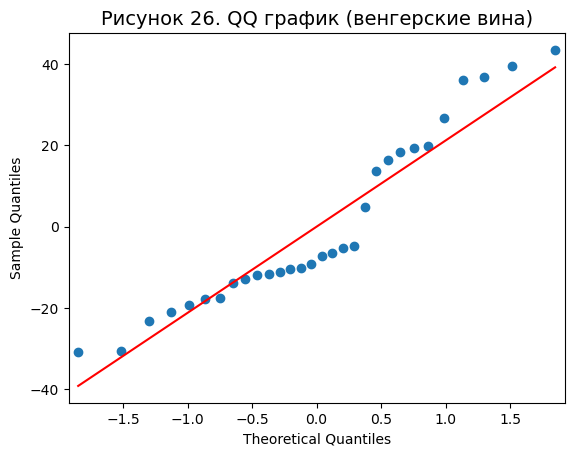

In [347]:
X = df3['price']
y = df3['points']
sm.qqplot(lr.resid, line='s')
plt.title('Рисунок 26. QQ график (венгерские вина)', fontsize=14);

При рейгрессионном анализе зависимости цен от рейтингов по странам QQ графики заметно различались. 

Добавим признак "color_code" в регрессионную модель:

In [439]:
import statsmodels.formula.api as smf
results = smf.ols('price ~ points + color_code', data=df3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     14.96
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           4.25e-05
Time:                        22:44:38   Log-Likelihood:                -133.93
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      27   BIC:                             278.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -484.1259    101.391     -4.775      0.000    -692.162    -276.090
points         6.0899      1.222      4.985      0.000       3.583       8.596
color_code    -5.1626      7.695     -0.671      0.508     -20.951      10.626
==============================================================================
Omnibus:                        3.204   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.653
Skew:                           0.619   Prob(JB):                        0.265
Kurtosis:                       2.232   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared=0.526 (было 0.518), Adj. R-squared=0.490 (было 0.500), F-statistic=14,96, P=0.00, coef Intercept=-484.13, coef points=6.09 
Добавление еще одного признака ("цвета") созданную регрессионную модель существенно не улучшает.

Text(0.5, 0, '')

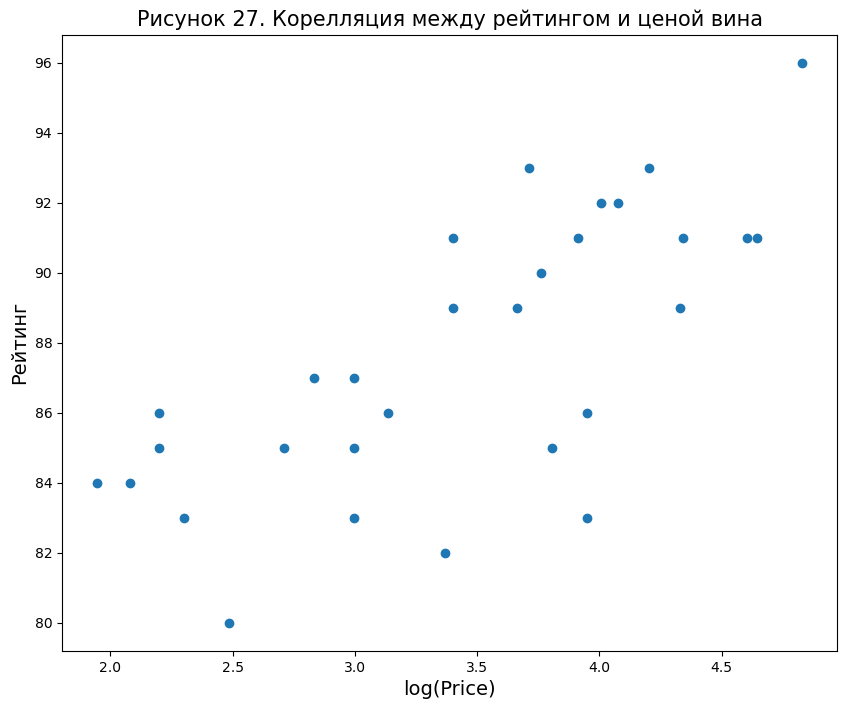

In [349]:
fig = plt.figure(figsize=(10,8))
xx = np.log(df3.price)
yy = df3.points
plt.scatter(xx,yy)
plt.xlabel('log(Price)', fontsize=14)
plt.ylabel('Рейтинг', fontsize=14)
plt.title('Рисунок 27. Корелляция между рейтингом и ценой вина',fontsize=15)
plt.figtext(0.5, 0, "" )

Корреляция между рейтингами венгерских вин и логарифмами цен довольно неплохо прослеживается на графике 27. 

#  <a name="5">5. Проверка гипотез </a>

#### Гипотеза-1: Рейтинги вина зависят от цвета. 
#### H0: Рейтинг вина не зависит от цвета
#### H1: Рейтинги вина разного цвета различны

In [ ]:
x1 = df5.loc[(df5['color_code']==1), 'points']
x2 = df5.loc[(df5['color_code']==2), 'points']

In [288]:
from scipy import stats
results = stats.levene(x1, x2)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.2629448672692582
Принять гипотезу о равенстве дисперсий


In [340]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги красных и белых вин не различаются')
else:
    print('Рейтинг не зависит от цвета вина') 

T-statistic value:  -1.2693258468941118
P-Value:  0.2185189227587194
Рейтинг не зависит от цвета вина


####  Выполним односторонний ANOVA. Будем использовать функцию f_oneway() из библиотеки SciPy для выполнения однофакторного дисперсионного анализа. F-значение — это мера того, насколько различаются значения каждой группы,  p-значение — это мера вероятности того, что различия в рейтингах вин Франции, Германии, Австрии и Венгрии не случайны

In [290]:
from scipy.stats import f_oneway
x1=df4['points']
x2=df1['points']
x3=df2['points']
x4=df3['points']
f_oneway(x1, x2, x3, x4)

F_onewayResult(statistic=3.0257804311394563, pvalue=0.028469893832553283)

In [292]:
fvalue, pvalue = stats.f_oneway(x1, x2, x3, x4)
print("F-statistic value: ", fvalue)
print("P-Value: ", pvalue)

F-statistic value:  3.0257804311394563
P-Value:  0.028469893832553283


F-значение = 3.0257804311394563, что свидетельствует о различиях рейтингов вин Франции, Германии, Австрии и Венгрии, 
pvalue<0,05, что подтверждает, что различия анализируемых рейтингов не случайны/

#### Гипотеза-2: Рейтинги немецких и французских вин различаются. Рейтинги немецких вин предположительно ниже.
#### H0: Рейтинги вин Германии и Франции одинаковые
#### H1: Рейтинги вин Германии и Франции различны, причем рейтинги немецких ниже

In [462]:
x1 = df1['points']
x2 = df4['points']
from scipy import stats
results = stats.levene(x1, x2)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.01964312768270411
Отклонить гипотезу о равенстве дисперсий


In [464]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'less')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги вин Германии и Франции одинаковые')
else:
    print('Рейтинги вин Германии и Франции различаются, причем рейтинги немецких ниже') 

T-statistic value:  1.7870878901602705
P-Value:  0.9627179051826507
Рейтинги вин Германии и Франции различаются, причем рейтинги Германии ниже


#### Гипотеза-3: Рейтинги венгерских и австрийских вин различаются. Рейтинги венгерских вин предположительно выше.
#### H0: Рейтинги вин Венгрии и Автсрии одинаковые
#### H1: Рейтинги вин Венгрии и Австрии различаются, причем рейтинги венгерских вин выше

In [88]:
x2 = df2['points']
x1 = df3['points']
from scipy import stats
results = stats.levene(x1, x2)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

2.0347998009107833e-07
Отклонить гипотезу о равенстве дисперсий


In [90]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'greater')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги вин Австрии и Венгрии не отличаются')
else:
    print('Рейтинги вин Австрии и Венгрии отличаются, причем рейтинги венгерских вин выше') 

T-statistic value:  -1.6485012050509917
P-Value:  0.9455074714902124
Рейтинги вин Австрии и Венгрии различаются, причем рейтинги немецких ниже


#### Гипотез-4: На рейтинги вин Германии оказывает влияние их цвет
#### H0: Рейтинги красных и белых вин Германии одинаковые
#### H1: Рейтинги красных и белых вин Германии различны

In [484]:
x1 = df1.loc[(df1['color_code']==1), 'points']
x2 = df1.loc[(df1['color_code']==2), 'points']

In [486]:
results = stats.levene(x1, x2)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.8898365610824217
Принять гипотезу о равенстве дисперсий


In [488]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги красных и белых немецких вин одинаковые')
else:
    print('Рейтинги красных и белых немецких вин различаются') 

T-statistic value:  -2.5486625850031515
P-Value:  0.029888868045392366
Рейтинги красных и белых немецких вин одинаковые


#### Гипотеза-5: На стоимость немецких вин оказывает влияние их цвет
#### H0: Цены красных и белых вин Германии одинаковые
#### H1: Цены красных и белых вин Германии различны

In [491]:
x1 = df1.loc[(df1['color_code']==1), 'price']
x2 = df1.loc[(df1['color_code']==2), 'price']

In [493]:
results = stats.levene(x1, x2)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.38505073196568296
Принять гипотезу о равенстве дисперсий


In [495]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Цены красных и белых немецких вин одинаковые')
else:
    print('Цены красных и белых немецких вин разные') 

T-statistic value:  -2.679533893884232
P-Value:  0.015126077758132666
Цены красных и белых немецких вин одинаковые


#### Гипотеза-6: На рейтинги вин Франции оказывает влияние их цвет
#### H0: Рейтинги красных и белых вин Франции одинаковые
#### H1: Рейтинги красных и белых вин Франции различны

In [106]:
x1 = df4.loc[(df4['color_code']==1), 'points']
x2 = df4.loc[(df4['color_code']==2), 'points']

In [108]:
results = stats.levene(x1, x2)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.42162358878269923
Принять гипотезу о равенстве дисперсий


In [110]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги красных и белых французских вин одинаковые')
else:
    print('Рейтинги красных и белых французских вин разные') 

T-statistic value:  -0.6739466286939091
P-Value:  0.5004521042280108
Рейтинги красных и белых французских вин разные


#### Гипотеза-7: На стоимость вин Франции оказывает влияние их цвет
#### H0: Цены красных и белых французских вин одинаковые
#### H1: Цены красных и белых французских вин различаются

In [468]:
x1 = df4.loc[(df4['color_code']==1), 'price']
x2 = df4.loc[(df4['color_code']==2), 'price']

In [470]:
results = stats.levene(x1, x2)
alpha = 0.05
print(results.pvalue)
if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.09157266351926076
Принять гипотезу о равенстве дисперсий


In [472]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Цены красных и белых французских вин одинаковые')
else:
    print('Цены красных и белых французских вин разные') 

T-statistic value:  1.2236787039861532
P-Value:  0.22126453319221187
Цены красных и белых французских вин разные


#### Гипотеза-8: На рейтинги вин Венгрии оказывает влияние их цвет
#### H0: Рейтинги красных и белых вин Венгрии одинаковые
#### H1: Рейтинги красных и белых вин Венгрии различны

In [321]:
x1 = df3.loc[(df3['color_code']==1), 'points']
x2 = df3.loc[(df3['color_code']==2), 'points']

In [323]:
results = stats.levene(x1, x2)
alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.3173978548911497
Принять гипотезу о равенстве дисперсий


In [325]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги красных и белых венгерских вин одинаковые')
else:
    print('Рейтинги красных и белых венгерских вин разные') 

T-statistic value:  -3.5820868411376394
P-Value:  0.0015638689492841141
Рейтинги красных и белых венгерских вин одинаковые


#### Гипотеза-9: На стоимость вин Венгрии оказывает влияние их цвет
#### H0: Цены красных и белых венгерских вин одинаковые
#### H1: Цены красных и белых венгерских вин различаются

In [327]:
x1 = df3.loc[(df3['color_code']==1), 'price']
x2 = df3.loc[(df3['color_code']==2), 'price']

In [329]:
results = stats.levene(x1, x2)
alpha = 0.05
print(results.pvalue)
if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.41693002118756106
Принять гипотезу о равенстве дисперсий


In [333]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'two-sided')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Цены красных и белых венгерских вин не отличаются')
else:
    print('Цены красных и белых венгерских вин различаются') 

T-statistic value:  -1.2693258468941118
P-Value:  0.2185189227587194
Цены красных и белых венгерских вин различаются


#### Гипотеза-10: На стоимость вин оказывает влияние возраст винодельни
#### H0: Цены не зависят от возраста винодельни
#### H1: Цены зависят от возраста винодельни, причем чем старше, тем цена выше

Рассмотрим продукцию австрийской старой винодельни Emmerich Knoll (основана в 1825 г) 
и новой венгерской винодельни Royal Tokaji (основана в 1990 году)

In [56]:
x1 = df2.loc[(df2['винодельня']=='Emmerich Knoll'), 'price']
x2 = df3.loc[(df3['винодельня']=='Royal Tokaji'), 'price']

In [60]:
from scipy import stats
results = stats.levene(x1, x2)
alpha = 0.05
print(results.pvalue)
if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.9069500900432023
Принять гипотезу о равенстве дисперсий


In [64]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'greater')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Цены вин, производимых старой австрийской и новой венгерской винодельнями не отличаются')
else:
    print('Цены вин, производимых старой австрийской и новой венгерской винодельнями различаются, причем цены у австриийской выше') 

T-statistic value:  0.19361466607862232
P-Value:  0.4247760962911799
Цены вин, производимых старой австрийской и новой венгерской винодельнями различаются, причем цены у австриийской выше


#### Гипотеза-10: На рейтинг вина оказывает влияние возраст винодельни
#### H0: Рейтинги не зависят от возраста винодельни
#### H1: Рейтинги зависят от возраста винодельни, причем чем старше, тем рейтинг выше

In [ ]:
x1 = df2.loc[(df2['винодельня']=='Emmerich Knoll'), 'points']
x2 = df3.loc[(df3['винодельня']=='Royal Tokaji'), 'points']

In [68]:
from scipy import stats
results = stats.levene(x1, x2)
alpha = 0.05
print(results.pvalue)
if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.9069500900432023
Принять гипотезу о равенстве дисперсий


In [70]:
t_stat, p_value = stats.ttest_ind(x1, x2, equal_var= False, alternative = 'greater')
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if (p_value < 0.05):
    print('Рейтинги вин, производимых старой австрийской и новой венгерской винодельнями не отличаются')
else:
    print('Рейтинги вин, производимых старой австрийской и новой венгерской винодельнями различаются, причем рейтинги у австриийской выше') 

T-statistic value:  0.19361466607862232
P-Value:  0.4247760962911799
Рейтинги вин, производимых старой австрийской и новой венгерской винодельнями различаются, причем рейтинги у австриийской выше


# <a name="6">6. Выводы</a>

#### 1. Исследовался набор данных с сайта Kaggle.com, рейтинги вина были составлены специализированным журналом Wine Enthusiast. В процессе предобработки данных был удален столбец "region_2', пропуски в столбцах "designation" и "region_1" были заменены на "unknown", были удалены строки с пропусками по столбцу "price", произведено удаление явных и неявных дубликатов, созданы столбцы "color" и "color_code".
#### 2. Самые высокие рейтинги принадлежат винам Франции (100), самые низкие - Венгрии (80). Средние рейтинги немного выше у Австрии, самые низкие - у Венгрии, а у Франции и Германии практически одинаковые.
#### 3. Средние цены венгерских вин (64,8) были выше, чем средние цены французских (46,8), средние цены немецких и австрийских вин оказались практически одинаковыми: 36 и 32 долл. соответственно. 
#### 4. Самое дорогое вино сорта "Bordeaux-style Red Blend" производят во французской провинции Bordeaux, на винодельне Château Latour. Его стоимость составляет 2300 долл. Следующее по цене вино тоже французское - Chardonnay, произвоимое в провинции Шампань на винодельне Krug (1400 долл). И замыкает тройку ценовых лидеров белое вино из Австрии - Grüner Veltliner, производимое на винодельне Emmerich Knoll (регион Вахау) стоимостью 1100 долл. Самое дешевое вино стоимостью всего 7 долл производится в Венгрии. 
#### 5. В анализируемых регионах белые сорта преобладают - их более 52% (красных - почти 36%). Видимо, это связано с климатическими условиями 48 параллели 
#### 6. В рассмотренных странах самыми популярными сортами оказались Рислинги (15,9%), Шардоне (11,7%), Bordeaux-style Red Blend (10,4%) и Пино Нуар (9,2). Самые популярные французские сорта: Шардоне, Bordeaux-style Red Blend и Пино Нуар, среди австрийских вин самое популярное Grüner Veltliner, далее идут Рислинговые сорта. В Германии они как раз самые популярные. В Венгрии лидируют Токайские - с большим отрывом.
#### 7. Подтвердились гипотезы о том, что рейтинги вин Франции, Германии, Австрии и Венгрии статистически значимо различаются. Кроме того, рейтинги вин Германии, ожидаемо, ниже французских, а рейтинги венгерских ниже австрийских. 
#### 8. В целом по странам не подтвердилась гипотеза о влиянии цвета вина на его рейтинг, что, например, справедливо для вин Германии и Венгрии. Однако влияние цвета на рейтинг французского вина было статистически значимо.  Были доказаны гипотезы о зависимости стоимости от цвета для вин Франции и Венгрии. В Германии данная гипотеза не подтвердилась.
#### 9. Гипотеза о том, что возраст винодельни влияет на стоимость и рейтинг ее продукции подтвердилась на примере австрийской винодельни Emmerich Knoll, основанной в 1825 году и венгерской винодельни Royal Tokaji, основанной в 1990 году. У винодельни с более богатой историей рейтинги и цены были значимо выше.
#### 10. Построенная нами модель линейной регрессии объясняет зависимость цен французских, немецких, австрийских и венгерских вина от рейтингов на 32, 19, 35 и 52% соответственно. Добавление в модели линейной регрессии еще одного признака ("цвета вина") модели значимо не улучшает. Однако все модели подтверждают, что чем выше рейтинг вина, тем выше его цена. Видимо, лучше рассматривать нелинейные регрессионные модели.

**<center>Список литературы</center>**


**Нормативные правовые акты:**
1.	Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

**Учебники и учебные пособия:**
1.	Андерсон. К., Аналитическая культура: от сбора данных до бизнес-результатов. - Москва : Манн, Иванов и Фербер, 2017.
2.	Нисчал Н., Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.
3.	Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2021.
4.	Пасхавер Б., Pandas в действии. — СПб.: Питер, 2023.
5.	Плас Дж. Вандер., Python для сложных задач: наука о данных — СПб.: Питер, 2024.
6.	Уилке К., Основы визуализации данных. Пособие по эффективной и убедительной подаче информации.— М.: Эксмо, 2024.

**Электронные ресурсы:**
1.	PEP 8 – руководство по стилю для кода Python [Электронный ресурс]: URL: https://peps.python.org/pep-0008/ ((дата обращения: 05.04.2024).
2.	Сайт Python Academy [Электронный ресурс]: URL: https://www.python-academy.com/ (дата обращения: 05.04.2024).

